## Ïã§Ïäµ 
Ï†ÑÏ≤òÎ¶¨-EDA-Í≤∞Ï†ïÎÇòÎ¨¥ÍπåÏßÄ. ÏßÅÏ†ëÌï¥Î≥¥Í∏∞
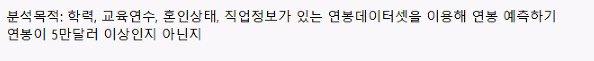
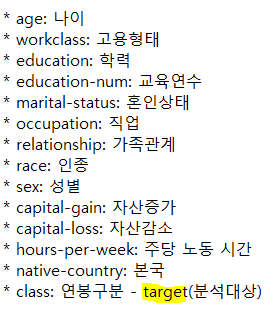
ÏßÅÏ†ë Ìï¥Î≥∏ Îã§ÏùåÏóêÎäî Î∞∞ÍπÖ(Í≤∞Ï†ïÎÇòÎ¨¥ÏôÄ Îã§Î•∏Í∞úÎÖê)ÏùÑ Î∞∞Ïö∏ ÏòàÏ†ï

In [32]:
# 0. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [102]:
pip install scikit-learn!

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.2 MB 6.7 MB/s eta 0:00:02
   ------------------------------ --------- 8.4/11.2 MB 27.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.2 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 21.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
# Î™®Îç∏ ÌïôÏäµ
from sklearn.model_selection import train_test_split
# Í≤∞Ï†ïÎÇòÎ¨¥
from sklearn.tree import DecisionTreeClassifier
# ÌèâÍ∞Ä ÏßÄÌëú
from sklearn.metrics import accuracy_score,classification_report

In [2]:
#1. Îç∞Ïù¥ÌÑ∞Î°úÎî©
data = pd.read_csv("./data/salary2.csv")
data.head()

age   workclass      education  education-num       marital-status  \
0   25     Private           11th              7        Never-married   
1   38     Private        HS-grad              9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm             12   Married-civ-spouse   
3   44     Private   Some-college             10   Married-civ-spouse   
4   18         NaN   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                 NaN    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country   class  
0             0              40   United-States   <=50K  
1             0              50   United-States   <=50K  
2             0              40   United-States    >50K  
3             0              40   United-States    >50K  
4             0              30   United-States   <=50K

## flow
0. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©
1. ÌÉÄÏù¥ÌÉÄÎãâ Îç∞Ïù¥ÌÑ∞ Î°úÎî©
    - Ìó§Îìú, ÌèâÍ∑†Í∞í, Ï§ëÏïôÍ∞í Î≥¥Î©¥ÏÑú 
    - Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖÏù¥ Ïù¥ÏÉÅÌïúÍ±¥ ÏóÜÎäîÏßÄ
    - ÏàòÏπòÌòï Ï§ëÏóê ÌèâÍ∑†Í∞íÍ≥º Ï§ëÏïôÍ∞í Ï∞®Ïù¥Í∞Ä ÏñºÎßàÎÇò ÎÇòÎäîÏßÄ.
2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨(2.1. Í≤∞Ï∏°Í∞íÏ≤òÎ¶¨, 2.2. Ïù¥ÏÉÅÍ∞íÌÉêÏßÄ)
    - Í≤∞Ï∏°Í∞í% Íµ¨ÌïòÍ∏∞ isna()
    - ÎπÑÏú®ÌÅ¨Î©¥ drop('ÏßÄÏö∏Ïª¨Îüº',axis=1)
- Í≤∞Ï∏° ÎπÑÏú®Ïù¥ ÏïΩ7%Ïù¥Í≥† ÏÇ≠Ï†úÌõÑ Îç∞Ïù¥ÌÑ∞Î∂ÑÌè¨Ïóê Ìé∏Ìñ•ÏùÑ Ï£ºÏßÄÏïäÏùå
    - workclass Ïª¨ÎüºÍ≤∞Ï∏°Í≥º occupationÍ≤∞Ï∏°
- ÏàòÏπò
    - fillna(Ìï¥ÎãπÏª¨Îüº ÌèâÍ∑†Í∞í)
- Î≤îÏ£º
    - fillna(Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Í∞í)
- ÎßàÏπúÌõÑ infoÎ°ú Í≤∞Ï∏°ÏóÜÎäîÏßÄ Ï≤¥ÌÅ¨<br>
2.2. Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄ
- plt.plot(kind='box')(Ï†ÑÏ≤¥Ïª¨Îüº Ï§ë Ïù¥ÏÉÅÍ∞í Ï∞æÍ∏∞)
    - data['Ïª¨Îüº'].describe()ÏôÄ .value_counts()ÏúºÎ°ú ÏßÑÏßúÏù¥ÏÉÅÍ∞íÏù∏ÏßÄ ÏÉùÍ∞ÅÌï¥Î≥¥Í∏∞.
    - Ïù¥ÏÉÅÍ∞í Î≤îÏúÑÍµ¨ÌïòÍ∏∞ IQRÏù¥Ïö© (describeÏóêÏÑú Ïù∏Îç±Ïã±)
    - Î≤îÏúÑ Î≤óÏñ¥ÎÇú ÏûêÎ£åÎ•º ÌïÑÌÑ∞ÎßÅ (ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú FareÏùò describeÎ•º Í∞ÅÍ∞Å Íµ¨Ìï®)
    - Ïù¥ÏÉÅÍ∞í ÏõêÏù∏ ÌååÏïÖ
3. EDA - ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞Î∂ÑÏÑù: Í∞Å Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞Î∂ÑÌè¨, Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏,<br> Î¨∏ÏûêÎäî Ïà´ÏûêÎ°ú, ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏
    - Î≤îÏ£ºÌòïÍ≥º ÏàòÏπòÌòï Î∂ÑÎ¶¨ÌïòÏó¨ÏÑú Í∞ÅÍ∞Å Îã¥Í∏∞
    - Ïª¨ÎüºÎì§ Íµ¨ÏÑ±ÏùÑ ÌååÏïÖÌïòÍ≥† plot() ÏúºÎ°ú Í∑∏ÎûòÌîÑ Î≥¥Í∏∞
    - Í∑∏ÎûòÎèÑ ÌååÏïÖÏù¥ÏïàÎêòÎ©¥(ÎÇòÏù¥,Í∞ÄÏ°±) ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú Íµ¨Í∞ÑÏ∞®Ïù¥Í∞Ä ÎìúÎü¨ÎÇòÍ≤å ÏãúÍ∞ÅÌôî.
4. Feature Enginnering( Î≥ÄÏàò ÏÑ†ÌÉù, ÏÉàÎ°úÏö¥ ÌäπÏÑ± ÏÉùÏÑ±, Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥ÄÏàòÏùò ÎçîÎØ∏ Î≥ÄÏàòÌôî(one-hot encoding)
    - pd.cut Ìï®ÏàòÎ°ú Í∏∞Ï°¥ Ïª¨ÎüºÏóê Ïà´Ïûê->Í∏ÄÏûê(10ÎåÄ) ÎÇ®Í∏∞Í∏∞*     
    - groupbyÏó∞ÏÇ∞ÏúºÎ°ú Ïª¨ÎüºÍ∞Ñ Ïó∞Í¥ÄÏÑ± ÌååÏïÖ<br> Ïù¥Îïå ÌèâÍ∑†(ÏÉùÏ°¥Ïú®) ÎïåÏóê Îî∞Îùº Ï†ÅÏö©.    
    - Î∂àÌïÑÏöîÌïú Ïª¨Îüº drop
    - ÎÇ®ÏùÄ Ïª¨Îüº one-hotÏù∏ÏΩîÎî© ÌïòÍ≥† Îã§ÏùåÎã®Í≥ÑÎ°ú.

5. ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎ•º ÎèÖÎ¶ΩÎ≥ÄÏàò(X)ÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò(y)Î°ú Î∂ÑÎ¶¨
    - XÎäî Î¨∏Ï†ú yÎäî Îãµ
    - XÏóê Îì§Ïñ¥Í∞ÄÏïºÌï† dfÏóêÎäî Î¨∏Ï†ú(ÏÉùÏ°¥)Ïª¨ÎüºÎßå Îπ†Ïßê.
    - yÎäî ÏÉùÏ°¥ (one-hotÏù∏ÏΩîÎî©ÏÉÅÌÉú) 

6. ÌôÄÎìúÏïÑÏõÉ: sklearnÏùò train_test_split ÌÜµÌï¥ÏÑú train, test ÏÑ∏Ìä∏Î°ú Î∂ÑÎ¶¨
    - Î∂ÑÏÑù Î™®Îç∏ÏÑ†ÌÉù
![image.png](attachment:image.png)    
7. sklearnÏóêÏÑú DecisionTreeClassifierÎ•º ÌÜµÌï¥ Î™®Îç∏ ÌõàÎ†®
    - Îç∞Ïù¥ÌÑ∞ ÏÖîÌîåÎßÅÏùÑ Ìï†Îïå ÌÉÄÍ≤üÏù¥ Ï∞®ÏßÄÌïòÎäî ÎπÑÏú®(Ìï¥ÎãπÏπºÎüºÏïàÏóêÏÑú) ÎßåÌÅº ÎèåÏïÑÍ∞àÏàòÏûàÍ≤å ÏßÄÏ†ïÌï¥Ï§òÏïºÌï®.stratify=y
8. testÏÑ∏Ìä∏Î•º Î™®Îç∏Ïóê ÎÑ£Ïñ¥ÏÑú ÏòàÏ∏°Í∞í ÏÉùÏÑ± ÌõÑ predÎ≥ÄÏàòÏóê Îã¥Í∏∞
9. accuracy_score(), classification_report()Î•º Ïù¥Ïö©Ìï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÌôïÏù∏

**ÏàòÎßéÏùÄ Ïª¨ÎüºÏ§ëÏóêÏÑú Î™©Ï†ÅÎ∂ÄÌï©ÌïòÎäî Î≥ÄÏàòÎì§Îßå Ïú†ÏßÄÌïòÎäîÍ≤É**

In [3]:
#1. Ï†ÑÏ≤¥ Ïª¨Îüº Ïàò: 14
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [67]:
data['native-country'].describe()

count              47985
unique                41
top        United-States
freq               43832
Name: native-country, dtype: object

# ÎØ∏Íµ≠ÏùÄÎ≥¥ÌÜµ 10~11ÎÖÑÏù¥ ÏùòÎ¨¥ÍµêÏú°Í∏∞Í∞Ñ.

In [4]:
data.columns 
# Ïù¥Ï§ëÏóê4: 'education','education-num'.'marital-status','occupation'

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [5]:
# ÍµêÏú°Ïó∞Ïàò
data['education-num'].describe()

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [6]:
# ÌòºÏù∏ ÏÉÅÌÉú
data['marital-status'].describe() # Ï§ëÏïôÍ∞í ÏïàÎÇòÏò§ÎäîÏù¥Ïú†
data['marital-status'].value_counts() # ÌòºÏù∏ ÏÉÅÌÉúÎèÑ Îã§ÏñëÌï¥ÏÑú.ÏñòÎèÑ 14Í∞ú Ïú†ÎãàÌÅ¨

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

#### Í≤∞Ìòº ÏÉÅÌÉú (marital-status) Ìï≠Î™© Î≤àÏó≠

| ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞               | ÌïúÍµ≠Ïñ¥ Î≤àÏó≠                | ÏÑ§Î™Ö |
|---------------------------|-----------------------------|------|
| `Married-civ-spouse`      | Í∏∞Ìòº - ÎØºÍ∞Ñ Í≤∞Ìòº           | ÏùºÎ∞òÏ†ÅÏù∏ Î≤ïÏ†ÅÏù∏ Í≤∞Ìòº ÏÉÅÌÉú (Î∂ÄÎ∂ÄÍ∞Ä Ìï®Íªò ÏÇ¨Îäî Í≤ΩÏö∞) |
| `Never-married`           | ÎØ∏Ìòº                       | Ìïú Î≤àÎèÑ Í≤∞ÌòºÌïú Ï†Å ÏóÜÏùå |
| `Divorced`                | Ïù¥Ìòº                       | Í≤∞ÌòºÌñàÎã§Í∞Ä Î≤ïÏ†ÅÏúºÎ°ú Ïù¥ÌòºÌï® |
| `Separated`               | Î≥ÑÍ±∞                       | Í≤∞ÌòºÏùÄ ÌñàÏßÄÎßå ÌòÑÏû¨ Î∞∞Ïö∞ÏûêÏôÄ Îñ®Ïñ¥Ï†∏ ÏßÄÎÇ¥Îäî Ï§ë |
| `Widowed`                 | ÏÇ¨Î≥Ñ                       | Î∞∞Ïö∞ÏûêÍ∞Ä ÏÇ¨ÎßùÌïòÏó¨ ÌòºÏûê Îêú ÏÉÅÌÉú |
| `Married-spouse-absent`  | Í∏∞Ìòº - Î∞∞Ïö∞Ïûê Î∂ÄÏû¨         | Í≤∞ÌòºÏùÄ ÌñàÏßÄÎßå Î∞∞Ïö∞ÏûêÍ∞Ä ÏßëÏùÑ Îñ†ÎÇò Ïû•Í∏∞Í∞Ñ Ïó∞ÎùΩÏù¥ ÏóÜÎäî Í≤ΩÏö∞ Îì± |
| `Married-AF-spouse`       | Í∏∞Ìòº - Íµ∞ Î≥µÎ¨¥ Ï§ëÏù∏ Î∞∞Ïö∞Ïûê | Íµ∞ Î≥µÎ¨¥ Ï§ëÏù∏ Î∞∞Ïö∞ÏûêÏôÄ Í≤∞ÌòºÌïú ÏÉÅÌÉú (AF = Armed Forces) |


In [7]:
# ÏßÅÏóÖ
data['occupation'].describe() # Ï§ëÏïôÍ∞í ÏïàÎÇòÏò§ÎäîÏù¥Ïú†
data['occupation'].value_counts() # ÏñòÎèÑ 14Í∞ú Ïú†ÎãàÌÅ¨

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

### ÏßÅÏóÖ (occupation) Ìï≠Î™© Î≤àÏó≠

| ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞            | ÌïúÍµ≠Ïñ¥ Î≤àÏó≠             | ÏÑ§Î™Ö |
|------------------------|--------------------------|------|
| `Prof-specialty`       | Ï†ÑÎ¨∏ÏßÅ                   | ÍµêÏàò, Í≥ºÌïôÏûê, ÏóîÏßÄÎãàÏñ¥, ÏùòÏÇ¨ Îì± Í≥†Îì± ÍµêÏú°ÏùÑ ÏöîÍµ¨ÌïòÎäî ÏßÅÏóÖ |
| `Craft-repair`         | Í∏∞Îä•Í≥µ Î∞è ÏàòÎ¶¨Í≥µ         | Î™©Ïàò, Ï†ÑÍ∏∞Í≥µ, Í∏∞Í≥Ñ ÏàòÎ¶¨Í≥µ Îì± Í∏∞Ïà† Í∏∞Î∞ò ÏàòÏûëÏóÖ |
| `Exec-managerial`      | ÏûÑÏõê Î∞è Í¥ÄÎ¶¨Ïûê           | Í∏∞ÏóÖÏùò Í¥ÄÎ¶¨Ïûê, Î∂ÄÏû•, ÏûÑÏõê Îì± |
| `Adm-clerical`         | ÌñâÏ†ï Î∞è ÏÇ¨Î¨¥ÏßÅ           | ÏÇ¨Î¨¥Î≥¥Ï°∞, Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†•, ÎπÑÏÑú Îì± |
| `Sales`                | ÏòÅÏóÖÏßÅ                   | ÌåêÎß§Ïõê, Îß§Ïû• ÏßÅÏõê, Î≥¥Ìóò/Î∂ÄÎèôÏÇ∞ ÌåêÎß§ Îì± |
| `Other-service`        | Í∏∞ÌÉÄ ÏÑúÎπÑÏä§ÏßÅ            | Ï≤≠ÏÜå, ÏöîÎ¶¨, ÎØ∏Ïö© Îì± Í∏∞ÌÉÄ ÏÑúÎπÑÏä§ Í¥ÄÎ†® ÏßÅÏóÖ |
| `Machine-op-inspct`    | Í∏∞Í≥Ñ Ï°∞Ïûë Î∞è Í≤ÄÏÇ¨ÏßÅ      | ÏÉùÏÇ∞ Í∏∞Í≥Ñ Ï°∞Ïûë, Í≥µÏ†ï Í≤ÄÏÇ¨ Îì± |
| `Transport-moving`     | Ïö¥ÏÜ° Î∞è Ïö¥Ï†ÑÏßÅ           | Ìä∏Îü≠ Ïö¥Ï†ÑÏÇ¨, Î∞∞Îã¨Ïõê Îì± Ïö¥ÏÜ° Í¥ÄÎ†® ÏßÅÏóÖ |
| `Handlers-cleaners`    | Î¨ºÎ•ò Î∞è Ï≤≠ÏÜå Îã¥Îãπ        | Ïßê ÎÇòÎ•¥Í∏∞, Í±¥Î¨º Ï≤≠ÏÜå Îì± Îã®Ïàú ÏûëÏóÖ |
| `Farming-fishing`      | ÎÜçÏóÖ Î∞è Ïñ¥ÏóÖ             | ÎÜçÎ∂Ä, Ïñ¥Î∂Ä Îì± ÏûêÏó∞ ÏûêÏõê Í∏∞Î∞ò ÏßÅÏóÖ |
| `Tech-support`         | Í∏∞Ïà† ÏßÄÏõê                | Ïª¥Ìì®ÌÑ∞, ÎÑ§Ìä∏ÏõåÌÅ¨ Îì± Í∏∞Ïà†Ï†Å Î¨∏Ï†ú Ìï¥Í≤∞ ÏßÄÏõê |
| `Protective-serv`      | Î≥¥Ïïà/Í≤ΩÎπÑ Í¥ÄÎ†®           | Í≤ΩÏ∞∞, ÏÜåÎ∞©Í¥Ä, Í≤ΩÎπÑÏõê Îì± Î≥¥Ìò∏ ÏÑúÎπÑÏä§ Í¥ÄÎ†® |
| `Priv-house-serv`      | Í∞ÄÏÇ¨ ÏÑúÎπÑÏä§ÏßÅ            | Í∞ÄÏ†ïÎ∂Ä, Ïú°ÏïÑ ÎèÑÏö∞ÎØ∏ Îì± Í∞ÄÏ†ï ÎÇ¥ ÏÑúÎπÑÏä§ |
| `Armed-Forces`         | Íµ∞Ïù∏                     | ÌòÑÏó≠ Íµ∞ Î≥µÎ¨¥ Ï§ëÏù∏ ÏÇ¨Îûå |


In [8]:
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

### ÍµêÏú° ÏàòÏ§Ä (education) Ìï≠Î™© Î≤àÏó≠

| ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞     | ÌïúÍµ≠Ïñ¥ Î≤àÏó≠        | ÏÑ§Î™Ö |
|----------------|---------------------|------|
| `HS-grad`      | Í≥†Îì±ÌïôÍµê Ï°∏ÏóÖ       | Í≥†Îì±ÌïôÍµê ÌïôÎ†• Î≥¥Ïú†Ïûê |
| `Some-college` | ÎåÄÌïôÍµê Ï§ëÌá¥ ÎòêÎäî Ïû¨Ìïô | ÎåÄÌïô Ï°∏ÏóÖÏùÄ Ïïà ÌñàÏßÄÎßå ÏùºÏ†ï ÌïôÏ†ê Ïù¥Ïàò |
| `Bachelors`    | ÌïôÏÇ¨                | ÎåÄÌïôÍµê Ï°∏ÏóÖ (4ÎÖÑÏ†ú) |
| `Masters`      | ÏÑùÏÇ¨                | ÎåÄÌïôÏõê ÏÑùÏÇ¨ Ï°∏ÏóÖÏûê |
| `Assoc-voc`    | Ï†ÑÎ¨∏ÎåÄ Ï°∏ÏóÖ (ÏßÅÏóÖ)  | ÏßÅÏóÖ ÍµêÏú° Ï§ëÏã¨Ïùò Ï†ÑÎ¨∏ÌïôÏÇ¨ (2~3ÎÖÑÏ†ú) |
| `11th`         | Í≥†Îì±ÌïôÍµê 2ÌïôÎÖÑ ÏàòÎ£å | 11ÌïôÎÖÑ, Í≥†2 Ï†ïÎèÑÏóê Ìï¥Îãπ |
| `Assoc-acdm`   | Ï†ÑÎ¨∏ÎåÄ Ï°∏ÏóÖ (ÌïôÎ¨∏)  | ÏùºÎ∞ò ÌïôÎ¨∏ Ï§ëÏã¨Ïùò Ï†ÑÎ¨∏ÌïôÏÇ¨ |
| `10th`         | Í≥†Îì±ÌïôÍµê 1ÌïôÎÖÑ ÏàòÎ£å | 10ÌïôÎÖÑ, Í≥†1 Ï†ïÎèÑÏóê Ìï¥Îãπ |
| `7th-8th`      | Ï§ëÌïôÍµê 1~2ÌïôÎÖÑ ÏàòÏ§Ä | Ï§ëÌïôÍµê ÏàòÏ§ÄÏùò ÍµêÏú° |
| `Prof-school`  | Ï†ÑÎ¨∏ÏßÅ ÎåÄÌïô Ï°∏ÏóÖ   | ÏùòÎåÄ, Î≤ïÎåÄ Îì± Ï†ÑÎ¨∏ÏßÅ ÎåÄÌïô Ï°∏ÏóÖ |
| `9th`          | Ï§ëÌïôÍµê 3ÌïôÎÖÑ ÏàòÎ£å   | 9ÌïôÎÖÑ, Ï§ë3 Ï†ïÎèÑÏóê Ìï¥Îãπ |
| `12th`         | Í≥†Îì±ÌïôÍµê 3ÌïôÎÖÑ ÏàòÎ£å | Í≥†3ÍπåÏßÄ ÎßàÏ≥§ÏßÄÎßå Ï°∏ÏóÖÏùÄ ÏïÑÎãò |
| `Doctorate`    | Î∞ïÏÇ¨                | Î∞ïÏÇ¨ ÌïôÏúÑ ÏÜåÏßÄÏûê |
| `5th-6th`      | Ï¥àÎì±ÌïôÍµê Í≥†ÌïôÎÖÑ     | 5~6ÌïôÎÖÑ ÏàòÏ§Ä |
| `1st-4th`      | Ï¥àÎì±ÌïôÍµê Ï†ÄÌïôÎÖÑ     | 1~4ÌïôÎÖÑ ÏàòÏ§Ä |
| `Preschool`    | Ïú†ÏπòÏõê              | Ï†ïÍ∑ú ÍµêÏú° ÏãúÏûë Ï†Ñ Îã®Í≥Ñ |


# Ï§ëÏïôÍ∞íÏùÄ Î™ªÎ¥§ÏßÄÎßå Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäîÏßÄ Ï∞çÏñ¥Î¥Ñ


In [9]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [10]:
# Í≤∞Ï∏°ÎπÑÏú® ÌôïÏù∏ lenÏì∞Í≤†Ïùå
#len(data['workclass']) # ÏñòÎäî Ïñ¥Ï∞®Ìîº ÏïàÏì∏Í±∞Í∏¥ÌïúÎç∞..
len(data['occupation'])
#len(data['native-country'])


48842

In [104]:
data.isna().sum() / len(data) *100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
edu_times         0.000000
marry             0.000000
dtype: float64

In [11]:
# ÏßÅÏóÖÏùò Í≤∞Ï∏°Î•†ÏùÄ 5ÌçºÏÑºÌä∏Ï†ïÎèÑ. 
2809/len(data['occupation'])*100

5.751197739650301

In [12]:
# ÎÇòÎ®∏ÏßÄ Í≤∞Ï∏°Í∞íÏûàÎäî Ïª¨ÎüºÎì§ÎèÑ Î¨∏Ï†úÎêòÏßÄÎäî ÏïäÏùå.
2799/len(data['workclass'])*100

5.7307235575938735

# Ïù¥Ï†ú Í≤∞Ï∏°ÏûêÎ¶¨Ïóê Ï±ÑÏö∏Í∞í Ï∞æÍ∏∞
- ÏßÅÏóÖÏùò ÌèâÍ∑†Í∞í? <br> ÌèâÍ∑†Ïù¥ÎêòÎäîÏßÅÏóÖÏùÑ Ï∞æÏïÑÏÑú Í∑∏Í±∏Î°ú ÎåÄÏ≤¥
- ÏßÅÏóÖÏùò ÌèâÍ∑†ÏùÑ Ï∞æÏúºÎ†§Î©¥?
- ÏßÅÏóÖÏùÄ Î≤îÏ£ºÌòï Ïù¥ÎØÄÎ°ú Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Prof-specialtyÍ∞Ä ÎåÄÏ≤¥Í∞íÏù¥ Îê†Í≤É.

In [13]:
# Í≤∞Ï∏°Îêú ÏûêÎ¶¨ indexÎßå Îî∞Î°ú Îã¥Í∏∞
occu_na_idx=data[data['occupation'].isna()].index

In [14]:
data['occupation'].mode()

0     Prof-specialty
Name: occupation, dtype: object

In [15]:
data['occupation']= data['occupation'].fillna(data['occupation'].mode()[0])

In [16]:
# Í≤∞Ï∏°Îêú ÎÇ¥Ïö© ÏóÜÏùå(1)
data.loc[occu_na_idx] 

age workclass      education  education-num       marital-status  \
4       18       NaN   Some-college             10        Never-married   
6       29       NaN        HS-grad              9        Never-married   
13      58       NaN        HS-grad              9   Married-civ-spouse   
22      72       NaN        7th-8th              4             Divorced   
35      65       NaN        HS-grad              9   Married-civ-spouse   
...    ...       ...            ...            ...                  ...   
48811   35       NaN      Bachelors             13   Married-civ-spouse   
48812   30       NaN      Bachelors             13        Never-married   
48820   71       NaN      Doctorate             16   Married-civ-spouse   
48822   41       NaN        HS-grad              9            Separated   
48823   72       NaN        HS-grad              9   Married-civ-spouse   

            occupation    relationship                 race      sex  \
4       Prof-specialty       Own-child                White   Female   
6       Prof-specialty       Unmarried                Black     Male   
13      Prof-specialty         Husband                White     Male   
22      Prof-specialty   Not-in-family                White   Female   
35      Prof-specialty         Husband                White     Male   
...                ...             ...                  ...      ...   
48811   Prof-specialty            Wife                White   Female   
48812   Prof-specialty   Not-in-family   Asian-Pac-Islander   Female   
48820   Prof-specialty         Husband                White     Male   
48822   Prof-specialty   Not-in-family                Black   Female   
48823   Prof-specialty         Husband                White     Male   

       capital-gain  capital-loss  hours-per-week  native-country   class  
4                 0             0              30   United-States   <=50K  
6                 0             0              40   United-States   <=50K  
13                0             0              35   United-States   <=50K  
22                0             0               6   United-States   <=50K  
35                0             0              40   United-States   <=50K  
...             ...           ...             ...             ...     ...  
48811             0             0              55   United-States    >50K  
48812             0             0              99   United-States   <=50K  
48820             0             0              10   United-States    >50K  
48822             0             0              32   United-States   <=50K  
48823             0             0              25   United-States   <=50K  

[2809 rows x 14 columns]

In [17]:
# isna ÏóÜÎäîÍ±∞ Ïù¥Î†áÍ≤å Ï∞çÏúºÎ©¥ ÎêòÎÇò???
data['occupation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48842 entries, 0 to 48841
Series name: occupation
Non-Null Count  Dtype 
--------------  ----- 
48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [18]:
# isnaÏùò Ìï©Ïù¥ 0ÎêúÏ†ê ÌôïÏù∏
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

# Ïù¥ÏÉÅÍ∞í ÌÉêÏßÄÌïòÍ∏∞


<Axes: >

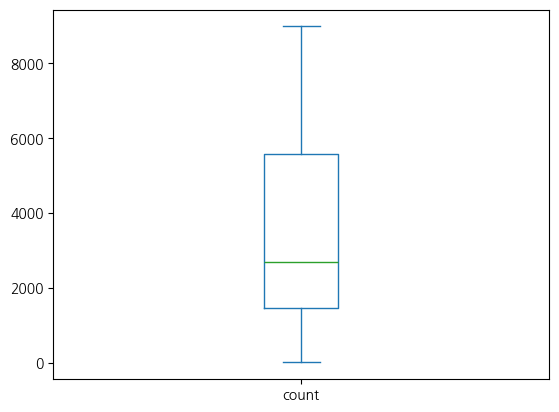

In [19]:
data['occupation'].value_counts().plot(kind='box')
# d0d Ï§ëÏïôÍ∞íÏù¥ ÏûàÍ∏¥ÌïòÎÑ§??

<Axes: >

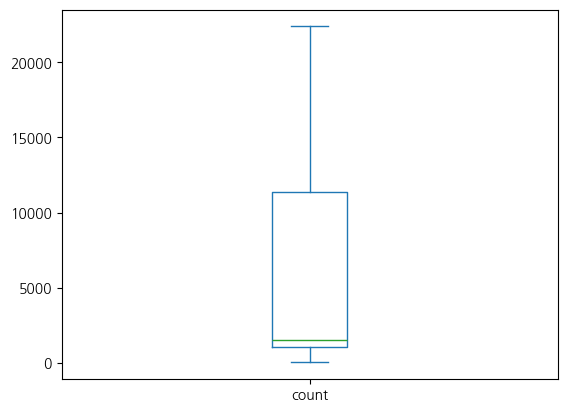

In [20]:
data['marital-status'].value_counts().plot(kind='box')
# d0d Ï§ëÏïôÍ∞íÏù¥ Í≥ÑÏÑ∏Ïöî.

# „Öá0„Öá!!

<Axes: >

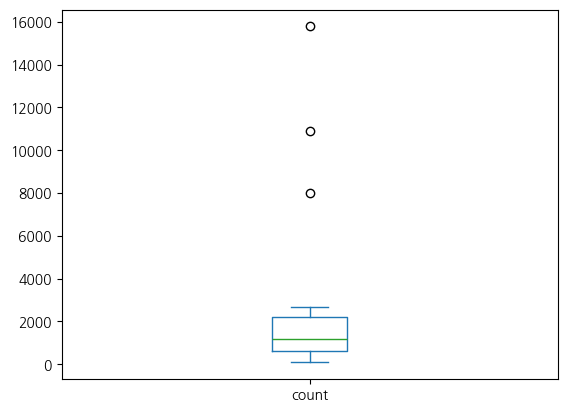

In [21]:
data['education-num'].value_counts().plot(kind='box')
# ÍµêÏú°Ïó∞ÏàòÏóê Í∞ëÏûêÍ∏∞ ÏóÑÏ≤≠ ÌÅ∞ÏàòÍ∞Ä ÏûàÏùå 

<Axes: >

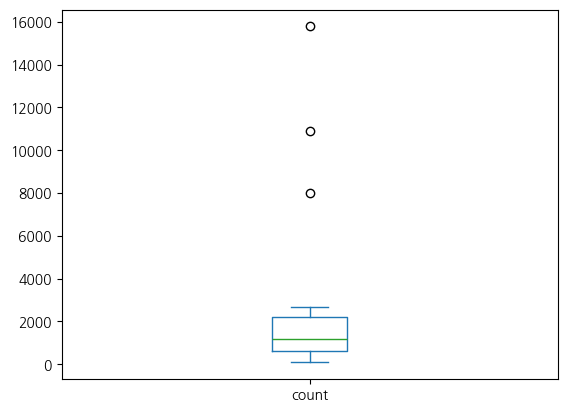

In [22]:
data['education'].value_counts().plot(kind='box')
# ÌïôÎ†•ÏóêÎèÑÏóê Í∞ëÏûêÍ∏∞ ÏóÑÏ≤≠ ÌÅ∞ÏàòÍ∞Ä ÏûàÏùå 

# Ïù¥ÏÉÅÍ∞í Î≤îÏúÑÎ∂ÄÌÑ∞ Íµ¨ÌïòÍ∏∞

In [23]:
nedu_desc= data['education-num'].describe()
nedu_desc

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [24]:
maximum_nedu = nedu_desc.loc['75%'] + 1.5*(nedu_desc.loc['75%'] - nedu_desc.loc['75%'] )
maximum_nedu 

np.float64(12.0)

# Î≤îÏúÑÏ¥àÍ≥ºÎêú Ïù¥ÏÉÅÍ∞íÎì§ Î™®ÏúºÍ∏∞

In [31]:
outliers= data[data['education-num'] > maximum_nedu].sort_values(by='education-num',ascending=False)
outliers

age      workclass   education  education-num          marital-status  \
48820   71            NaN   Doctorate             16      Married-civ-spouse   
16301   40        Private   Doctorate             16      Married-civ-spouse   
133     42   Self-emp-inc   Doctorate             16      Married-civ-spouse   
48813   34        Private   Doctorate             16      Married-civ-spouse   
126     48    Federal-gov   Doctorate             16      Married-civ-spouse   
...    ...            ...         ...            ...                     ...   
183     37        Private   Bachelors             13                 Widowed   
188     34      State-gov   Bachelors             13   Married-spouse-absent   
190     33        Private   Bachelors             13      Married-civ-spouse   
191     39        Private   Bachelors             13               Separated   
201     28   Self-emp-inc   Bachelors             13      Married-civ-spouse   

             occupation    relationship    race      sex  capital-gain  \
48820    Prof-specialty         Husband   White     Male             0   
16301    Prof-specialty         Husband   White     Male             0   
133      Prof-specialty         Husband   White     Male             0   
48813    Prof-specialty         Husband   White     Male             0   
126      Prof-specialty            Wife   White   Female             0   
...                 ...             ...     ...      ...           ...   
183     Exec-managerial   Not-in-family   White   Female             0   
188     Farming-fishing   Not-in-family   Black     Male             0   
190     Exec-managerial         Husband   White     Male             0   
191      Prof-specialty   Not-in-family   White     Male             0   
201     Exec-managerial         Husband   White     Male             0   

       capital-loss  hours-per-week  native-country   class  
48820             0              10   United-States    >50K  
16301             0              60   United-States    >50K  
133               0              41   United-States    >50K  
48813             0              60   United-States    >50K  
126               0              40   United-States    >50K  
...             ...             ...             ...     ...  
183               0              55   United-States   <=50K  
188               0              40             NaN   <=50K  
190            1977              40   United-States    >50K  
191               0              50   United-States    >50K  
201               0              50   United-States   <=50K  

[12110 rows x 14 columns]

## ÎÇ®Ìé∏Îì§?Ïù¥ Ïôú ÍµêÏú°Í∏∞Í∞ÑÏù¥ Í∏∏ÏóàÎäîÍ∞Ä.
ÏùºÎã® ÌïôÎ†•Í≥ºÏùò Ïó∞Í¥ÄÏÑ±ÏùÑ Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥Í≤†Ïùå
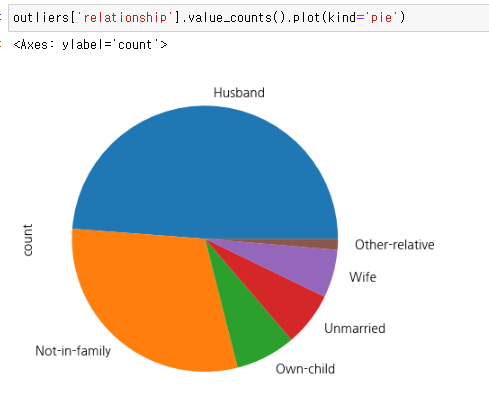

##### Í¥ÄÍ≥Ñ Ïú†Ìòï (relationship) Ìï≠Î™© Î≤àÏó≠

| ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞       | ÌïúÍµ≠Ïñ¥ Î≤àÏó≠         | ÏÑ§Î™Ö |
|------------------|----------------------|------|
| `Husband`        | ÎÇ®Ìé∏                 | Í∞ÄÍµ¨ ÎÇ¥ Í∞ÄÏû•Ïù¥Ïûê Î∞∞Ïö∞Ïûê Ïó≠Ìï†Ïùò ÎÇ®ÏÑ± |
| `Not-in-family`  | Í∞ÄÏ°± ÏïÑÎãò            | ÌòºÏûê Í±∞Ï£ºÌïòÍ±∞ÎÇò ÌïòÏàôÏù∏, ÏπúÍµ¨ Îì± |
| `Own-child`      | ÏûêÎÖÄ                 | ÏûêÎÖÄÎ°úÏÑú Îì±Î°ùÎêú Í∞ÄÍµ¨ Íµ¨ÏÑ±Ïõê |
| `Unmarried`      | ÎØ∏Ìòº                 | Í≤∞ÌòºÌïòÏßÄ ÏïäÏïòÍ≥† ÎèÖÎ¶ΩÏ†ÅÏù∏ ÏÉÅÌÉú |
| `Wife`           | ÏïÑÎÇ¥                 | Í∞ÄÍµ¨ ÎÇ¥ Í∞ÄÏû•Ïùò Î∞∞Ïö∞ÏûêÏù∏ Ïó¨ÏÑ± |
| `Other-relative` | Í∏∞ÌÉÄ ÏπúÏ≤ô            | Ï°∞Î∂ÄÎ™®, ÏÇºÏ¥å, ÏÇ¨Ï¥å Îì± Í∏∞ÌÉÄ Í∞ÄÏ°± |


In [30]:
data['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [46]:
data['edu_times']= pd.cut(data['education-num'],
       bins=[0,12,17], 
       labels=['under 12years','13~16'],
      right=False)

In [47]:
data[['edu_times','education']]

edu_times      education
0      under 12years           11th
1      under 12years        HS-grad
2              13~16     Assoc-acdm
3      under 12years   Some-college
4      under 12years   Some-college
...              ...            ...
48837          13~16     Assoc-acdm
48838  under 12years        HS-grad
48839  under 12years        HS-grad
48840  under 12years        HS-grad
48841  under 12years        HS-grad

[48842 rows x 2 columns]

In [48]:
data[['edu_times','education']].describe()

edu_times education
count           48842     48842
unique              2        16
top     under 12years   HS-grad
freq            35131     15784

In [54]:
data[data['edu_times']=='13~16']

<Axes: ylabel='count'>

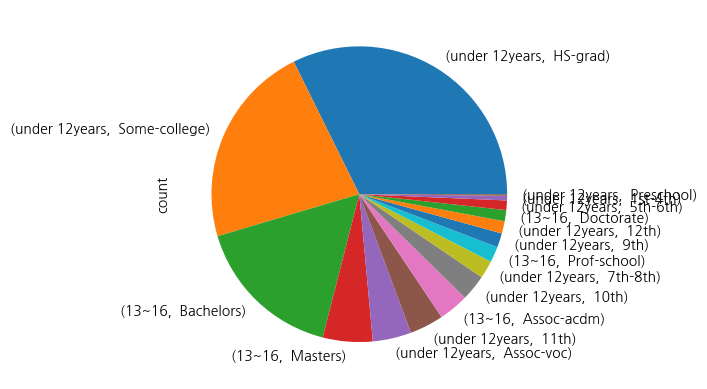

In [52]:
data[['edu_times','education']].value_counts().plot(kind='pie')

## nedu_max Îäî 12ÎÖÑ Ï¥àÍ≥ºÌïú Í≤ΩÏö∞Î•º Îã¥Ïùå

In [73]:
# ÏßÅÏóÖÏù¥ Î¨¥ÏóáÏù∏ÏßÄÏóê Îî∞Îùº ÍµêÏú°Í∏∞Í∞ÑÍ≥º ÏÜåÎìùÏù¥ Îã¨ÎùºÏßàÏàòÏûàÎã§Í≥†Î¥Ñ
# ÏßÄÍ∏à Ï§ëÏöîÌïúÍ±¥ Í∏∞Í∞ÑÏù¥ 12ÎÖÑ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞Îì§Ïù¥ÎØÄÎ°ú

nedu_max=data[data['edu_times']=='13~16']
nedu_max[['education','occupation']].describe()


education       occupation
count        13711            13711
unique           5               14
top      Bachelors   Prof-specialty
freq          8025             5293

# prof-specialtyÎäî Ï†ÑÎ¨∏ÏßÅ.
Ï†ÑÎ¨∏ÏßÅÏùÑ Ï§ÄÎπÑÌïòÍ∏∞ÏúÑÌïú Í∏∞Í∞ÑÏù¥ Í∏∏ÏßÄ ÏïäÏïòÎÇò ÌåêÎã®Îê®.
# Îî∞ÎùºÏÑú Ïù¥ÏÉÅÍ∞íÏùÄ Í∑∏ÎåÄÎ°ú ÎëêÍ∏∞Î°ú?
16ÎÖÑÏ†ïÎèÑÎäî Î¨¥Î∞©ÌïòÎã§Í≥† Î≥¥Ïó¨Ïßê Í∑∏ÎåÄÎ°ú ÎëêÍ∏∞.<br>
Îã§Î•∏ Ïª¨ÎüºÎì§ Ïù¥ÏÉÅÍ∞í Ï≤¥ÌÅ¨Î™ªÌñàÏùå

# ÌòºÏù∏ÏÉÅÌÉúÎ•º one-hotÏúºÎ°ú Î∂ÑÎ•ò

# Î≤îÏ£ºÏôÄ ÏàòÏπòÎ•º Î∂ÑÎ¶¨ÌïòÍ∏∞.

In [74]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

## Ïã±Í∏ÄÏïÑÎãò not_s Îî∞Î°ú ÎßåÎì§ÏóàÏúºÎÇò

In [75]:
not_s=pd.get_dummies(data,columns=['marital-status'], drop_first=True)

In [87]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [105]:
data['marry']=data['marital-status'].astype('str')
data['marry'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Divorced',
       ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

<Axes: ylabel='count'>

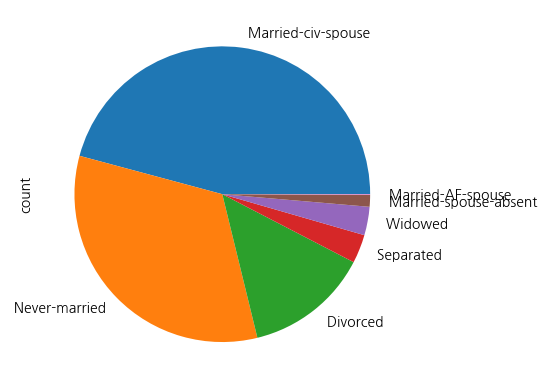

In [83]:
not_sg = data[data['marital-status']==' Married-civ-spouse']
data['marital-status']==''
data['marital-status']==''
data['marital-status']==''




In [112]:
data['race'].unique()

array([' Black', ' White', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [113]:
data[data['native-country']==' South']

age          workclass      education  education-num  \
377     24            Private        HS-grad              9   
746     30   Self-emp-not-inc        HS-grad              9   
1303    21            Private        HS-grad              9   
1438    19                NaN   Some-college             10   
1875    28            Private      Bachelors             13   
...    ...                ...            ...            ...   
45769   36            Private        HS-grad              9   
46628   39   Self-emp-not-inc      Bachelors             13   
46814   50   Self-emp-not-inc        HS-grad              9   
47583   60            Private        Masters             14   
48032   22                NaN   Some-college             10   

            marital-status          occupation    relationship  \
377          Never-married     Exec-managerial       Own-child   
746     Married-civ-spouse   Machine-op-inspct       Own-child   
1303         Never-married   Handlers-cleaners   Not-in-family   
1438         Never-married      Prof-specialty       Own-child   
1875         Never-married      Prof-specialty   Not-in-family   
...                    ...                 ...             ...   
45769        Never-married        Craft-repair   Not-in-family   
46628   Married-civ-spouse     Exec-managerial         Husband   
46814   Married-civ-spouse       Other-service         Husband   
47583   Married-civ-spouse        Adm-clerical         Husband   
48032        Never-married      Prof-specialty       Own-child   

                      race      sex  capital-gain  capital-loss  \
377     Asian-Pac-Islander   Female             0             0   
746     Asian-Pac-Islander     Male             0             0   
1303    Asian-Pac-Islander   Female             0             0   
1438    Asian-Pac-Islander     Male             0             0   
1875    Asian-Pac-Islander     Male             0             0   
...                    ...      ...           ...           ...   
45769   Asian-Pac-Islander     Male             0             0   
46628   Asian-Pac-Islander     Male             0             0   
46814   Asian-Pac-Islander     Male             0             0   
47583   Asian-Pac-Islander     Male             0             0   
48032   Asian-Pac-Islander   Female             0             0   

       hours-per-week native-country   class      edu_times  \
377                40          South   <=50K  under 12years   
746                60          South   <=50K  under 12years   
1303               34          South   <=50K  under 12years   
1438                2          South   <=50K  under 12years   
1875               50          South    >50K          13~16   
...               ...            ...     ...            ...   
45769              70          South   <=50K  under 12years   
46628              50          South   <=50K          13~16   
46814              60          South   <=50K  under 12years   
47583              50          South    >50K          13~16   
48032              15          South   <=50K  under 12years   

                     marry  
377          Never-married  
746     Married-civ-spouse  
1303         Never-married  
1438         Never-married  
1875         Never-married  
...                    ...  
45769        Never-married  
46628   Married-civ-spouse  
46814   Married-civ-spouse  
47583   Married-civ-spouse  
48032        Never-married  

[115 rows x 16 columns]

In [ ]:
data.describe() # Ïó¨Í∏∞Ïóê classÎèÑ ÎÇòÏò¨Ïàò ÏûàÍ≤å.
data['caplital_gain'].value_counts()
# Ìà¨ÏûêÏÜåÎìùÏù¥ ÏóÜÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏïÑÏÑú IQR Í≥ÑÏÇ∞ÎèÑ Ïñ¥Î†µÎã§
# Ïù¥ÏÉÅÍ∞í ÏóÜÎã§
# Í∑ºÎ¨¥ÏãúÍ∞Ñ, Ìà¨ÏûêÏÜåÎìùÏù¥ÎÇò Ìà¨ÏûêÏÜêÌï¥ÎÇò Î™®Îëê Ïù¥ÏÉÅÍ∞í ÏóÜÎã§



**ÌíÄÏù¥Îì§ÏúºÎ©¥ÏÑú ÎåÄÏ∂©ÌïÑÍ∏∞**<br>
EDA Ìï†Îïå Î≤îÏ£ºÌòï Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Î∂ÑÎ¶¨ÌïòÍ∏∞
obj_cols=
num_cols= Îî∞Î°ú Ï†ÄÏû•
ÌïòÎÇòÏî© Ï∞çÏñ¥Î≥¥Í∏∞ ÌûòÎìúÎãàÍπå Î∞òÎ≥µÎ¨∏ ÏÇ¨Ïö©

data.select_dtypes(include='object') exÎ°úÎßå Î∞îÍæ∏Î©¥ Îê®

Î∞òÎ≥µÎ¨∏Ïóê Î≥ÄÏàòÎ™Ö ÌïòÎÇòÏî© ÎÑ£Ïñ¥ÏÑú ÎÇ¥Ïö©Î¨º Ï∞çÏñ¥Î≥¥ÎèÑÎ°ù

- Ïú†ÎãàÌÅ¨Í∞Ä Ïª¨ÎüºÎßàÎã§ Î™áÍ∞úÏù∏ÏßÄ ÏïåÎ†§Î©¥


for col in obj_cols:
    print(obj_cols[col].value_counts())
    
ÌïôÎ†• Î≥Ñ ÏÜåÎìù 5ÎßåÏù¥ÏÉÅÏùÑ Í∞ÄÏ†∏Ïò§Î†§Î©¥?

tatio_result=
X = pd.get_dummies(data_set1,drop_first=True)
y= data['class']

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÌäúÎãù <br> Î™®Îç∏ÏÑ±Îä•Í∞úÏÑ†
ÏßÄÎãàÏßÄÏàò(ÌÅ¨Î¶¨ÌÖåÎ¶¨Ïñ∏) Î∂ÑÎ•ò ÏïåÍ≥†Î¶¨Ï¶òÏù¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÏïàÏóêÏûàÏùå ÍπäÏù¥ÎèÑ ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÎèÑÎã¨Ìï†ÎïåÍπåÏßÄ ÏßàÎ¨∏ÏùÑ ÎçòÏßÄÎäîÎç∞ ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥Ïùò Í≥ºÏ†ÅÌï©ÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌïú max_depth(ÍπäÏù¥ÎùºÍ≥†ÌïòÎäî ÏßàÎ¨∏ Ïàò Ï†úÌïú) ccp_alphaÎäî Í∞ÄÏßÄÏπòÍ∏∞. 

In [119]:
for i in range(1,11): # 1Î∂ÄÌÑ∞ 11ÍπåÏßÄ
    dtc= DecisionTreeClassifier(max_depth=10, random_state=10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print("="*30, f"max_depth: {i}", "="*30)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

NameError: name 'X_train' is not defined

# ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥ ÏãúÍ∞ÅÌôî

In [34]:
from sklearn.tree import plot_tree

In [118]:
plt.figure(figsize=(20,20))
plot_tree(dtc, feature_names=dtc.feature_names_in_, max_depth=3- 7 fontsize=15, filled=True)
plt.show()

NameError: name 'dtc' is not defined

<Figure size 2000x2000 with 0 Axes>

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î™®Îç∏Ïùò ÏÑ±Îä•ÌèâÍ∞Ä

In [1]:
print(classification_report(y_test,pred))

NameError: name 'classification_report' is not defined

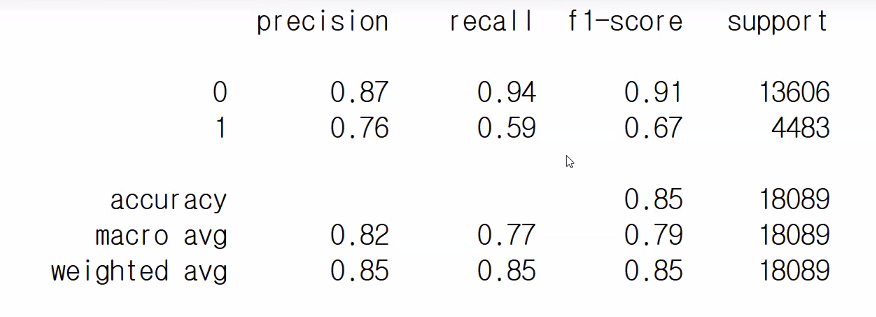
1. accuracy(Ï†ïÌôïÎèÑ/Ï†ïÎ∂ÑÎ•òÏú®): 1ÏùÑ 1Î°ú 0ÏùÑ 0ÏúºÎ°ú ÎßûÏ∂îÎäî ÎπÑÏú®
2. False Positive Rate(Ïò§Î∂ÑÎ•òÏú®/Ïò§ÎãµÎ•†): 1ÏùÑ 0ÏúºÎ°ú ÏòàÏ∏° 0ÏùÑ 1Î°ú ÏûòÎ™ª ÏòàÏ∏°.
3. precision (Ï†ïÎ∞ÄÎèÑ): ÏòàÏ∏°Ìïú Í≤É Ï§ëÏóêÏÑú Ïã§Ï†úÎ°ú ÎßûÏùÄ Í≤É. ÏòàÏ∏° positive Ï§ëÏóêÏÑú Ïã§Ï†ú positiveÏù∏ ÎπÑÏú®
4. recall(ÎØºÍ∞êÎèÑ/Ïû¨ÌòÑÏú®): Ïã§Ï†úÍ∞íÏùÑ Ïã§Ï†úÍ∞íÏúºÎ°ú Ïûò ÏòàÏ∏°Ìïú Í≤É. Ïã§Ï†ú positiveÏ§ë ÏòàÏ∏° positiveÍ∞Ä ÎßûÏùÄÍ≤É
<br>**precisionÏùÄ ÏòàÏ∏°Í∞íÏùÑ ÏûòÏ∞æÍ≥†.<br> recallÏùÄ Ïã§Ï†úÎ•º ÏûòÏ∞æÏùå <br>Îëê Í∞íÏùÄ Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑÍ¥ÄÍ≥Ñ**
5. F1-Score: precisionÍ≥º recallÏùò Ï°∞Ìôî ÌèâÍ∑†Ïù¥ÎØÄÎ°ú Ïù¥Í∞íÏù¥ ÎÜíÏúºÎ©¥ 
6. Specificity(ÌäπÏù¥ÎèÑ): Ïã§Ï†ú negativeÏ§ë ÏòàÏ∏°Ïóê ÏÑ±Í≥µÌïú ÎπÑÏú®
- Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑ Í¥ÄÍ≥Ñ
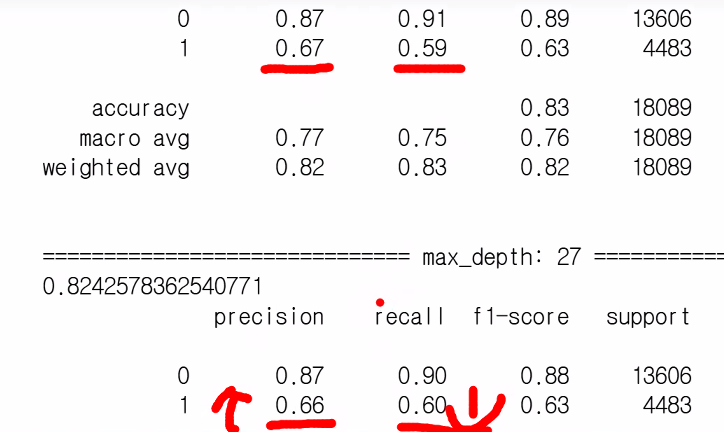

# confusion matrix(ÌòºÎèôÌñâÎ†¨)

|               | **ÏòàÏ∏° Positive** | **ÏòàÏ∏° Negative** |
|:-------------:|:-----------------:|:-----------------:|
| **Ïã§Ï†ú Positive**  | **TP**<br>(True Positive)<br>‚Üí Ïã§Ï†úÎèÑ ÏñëÏÑ±Ïù¥Í≥†, ÏòàÏ∏°ÎèÑ ÏñëÏÑ± | **FN**<br>(False Negative)<br>‚Üí Ïã§Ï†úÎäî ÏñëÏÑ±Ïù∏Îç∞, ÏòàÏ∏°ÏùÄ ÏùåÏÑ± |
| **Ïã§Ï†ú Negative**  | **FP**<br>(False Positive)<br>‚Üí Ïã§Ï†úÎäî ÏùåÏÑ±Ïù∏Îç∞, ÏòàÏ∏°ÏùÄ ÏñëÏÑ± | **TN**<br>(True Negative)<br>‚Üí Ïã§Ï†úÎèÑ ÏùåÏÑ±Ïù¥Í≥†, ÏòàÏ∏°ÎèÑ ÏùåÏÑ± |

---

### üß† Ïö©Ïñ¥ ÌíÄÏù¥

- **TP (True Positive)**: ÎßûÍ≤å **ÏñëÏÑ±**Ïù¥ÎùºÍ≥† ÏòàÏ∏°Ìï®  
- **FN (False Negative)**: **ÏñëÏÑ±Ïù∏Îç∞ ÎÜìÏπ®** (ÏòàÏ∏°ÏùÑ ÌãÄÎ¶º)  
- **FP (False Positive)**: **ÏùåÏÑ±Ïù∏Îç∞ ÏûòÎ™ª ÏòàÏ∏°Ìï®**  
- **TN (True Negative)**: ÎßûÍ≤å **ÏùåÏÑ±**Ïù¥ÎùºÍ≥† ÏòàÏ∏°Ìï®  


ÏòàÏ∏°: ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥Ïùò Í≤∞Í≥ºÎ•º Îã¥ÏùÄ predÍ∞Ä ÏòàÏ∏°<br>
Ïã§Ï†ú: Ïã§Ï†úÎç∞Ïù¥ÌÑ∞
- TP: Ïã§Ï†úÏôÄ ÏòàÏ∏° Î™®Îëê Positive <br> Ïó∞Î¥â 5ÎßåÏ¥àÍ≥ºÏûêÎ•º ÏòàÏ∏°ÌïòÍ≥† Ïã§Ï†úÎ°úÎèÑ Ïó∞Î¥â 5ÎßåÏù¥ ÏïàÎê®.
- TN: Ïã§Ï†úÏôÄ ÏòàÏ∏° Î™®Îëê Negative <br> Ïó∞Î¥â5ÎßåÏù¥ ÏïàÎêúÎã§Îäî ÏòàÏ∏°Í≥º Ïã§Ï†úÎ°úÎèÑ Ïó∞Î¥â 5ÎßåÏù¥ ÏïàÎêòÎäî Í≤ÉÏù¥ ÌôïÏù∏.
- FP(1Ìòï Ïò§Î•ò): ÏòàÏ∏° Positive - Ïã§Ï†ú Negative<br> 5ÎßåÏù¥ÎêúÎã§- ÏïàÎêòÎÑ§
- FN(2Ìòï Ïò§Î•ò): ÏòàÏ∏° Negative - Ïã§Ï†ú Positive<br> ÏïàÎêúÎã§ - ÎêòÎÑ§

    
#### Ï†ïÌôïÎèÑ (accuracy) Í≥ÑÏÇ∞ÌïòÍ∏∞
Ï†ïÌôïÎèÑÎäî Î¨¥ÏóáÏùò ÌèâÍ∑†Ïù∏Í∞Ä:  $ TP + TN \over TP+TN+FP+FN $
#### Ïò§Î∂ÑÎ•òÏú® (FPR)
Ï†ïÌôïÎèÑÏôÄ Î∞òÎåÄÎêòÎäîÍ∞úÎÖê: $ FP+FN \over TP+TN+FP+FN $
#### Ï†ïÎ∞ÄÎèÑ(precision)
ÏòàÏ∏° ÏûòÌïúÍ≤ÉÍ≥º Î™ªÌïúÍ≤É ÎÇòÎààÍ≤É : $ TP \over TP+FP $
#### Ïû¨ÌòÑÏú®/ÎØºÍ∞êÎèÑ ( recll )
Ïã§Ï†ú Í∞í Ï§ë PositiveÍ∞Ä Ï§ëÏöîÌï®: $ TP \over TP+FN $
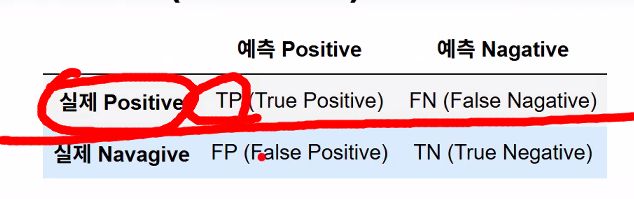
#### ÌäπÏù¥ÎèÑ (Specificity)
$ TN \over FP+TN $
#### F1-score
- precisionÍ≥º Ïû¨ÌòÑÏú® <br>
* F1-score: $  2 \cdot {Precision \cdot Recall \over Precision + Recall} $   

In [33]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred,display_labels=[0,1]))

#### F1Ï†êÏàòÎßå Î≥ºÍ≤åÏïÑÎãàÎùº Îã§Î•∏Í∞íÎèÑ Ï≤¥ÌÅ¨Ìï¥ÏïºÌïòÎäîÏù¥Ïú†.
recall Í∞íÏù¥ ÎÜíÏùÄ Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌï¥ÏïºÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÍ∏∞ ÎïåÎ¨∏.<br>
Ïπ®ÏûÖÏòàÏ∏°, ÏïîÏßÑÎã®ÏòàÏ∏°Ïù¥P ÏùºÎïå<br>
ÏïîÏù∏Ï§Ñ ÏïåÏïòÎäîÎç∞ ( ÏòàÏ∏° ) <br>
Ïã§Ï†úÎäî ÏïîÏù¥ ÏïÑÎãå Í≤ΩÏö∞ FP <br>
recallÍ∞íÏùÄ ÏïîÏù¥ ÏïÑÎãåÍ±∏ ÎßûÏ∂îÎäî Í≤©.

# Dataset2: Î™®Îì† Ïª¨ÎüºÏùÑ ÎÑ£Ïñ¥ Î∂ÑÏÑùÌï¥Î≥¥Í∏∞.
- Î∂àÌïÑÏöîÌï¥Î≥¥Ïù¥Îäî Ïª¨ÎüºÏùÑ dropÌñàÎäîÎç∞ Ï†ïÌôïÎèÑÍ∞Ä ÎÇÆÏïÑÏßê
- ÏÇ¨ÎûåÏù¥ ÏïåÏïÑÎÇº Ïàò ÏóÜÎäî ÏòÅÏó≠ÏùÑ Í∞êÏïàÌïòÎèÑÎ°ù Î®∏Ïã†Îü¨ÎãùÏùÑ ÏßÑÌñâÌïòÎäîÍ≤É.
- Í∑∏ÎûòÎèÑ EDAÎäî Îπ°ÏÑ∏Í≤å Ìï¥ÏïºÌïúÎã§. Î™®Îç∏ÏùÑ ÌäúÎãùÌï†Îïå ÌïÑÏöîÌï®.
- **ÎìúÎ°≠ÌïòÏßÄ ÏïäÍ≥† Î™®Îì† Ïª¨ÎüºÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Îäî Î∞©Î≤ï**
- Î∂ÑÏÑùÏïåÍ≥†Î¶¨Ï¶òÎèÑ Ïó¨Îü¨Í∞ÄÏßÄÎ°ú ÎèåÎ†§ÏÑú ÎπÑÍµêÌï¥Î≥∏Îã§Í≥†.
- Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ±Ïóê Îî∞Îùº Í≤∞Í≥ºÍ∞Ä ÏûòÎÇòÏò§Îäî Í≤ΩÏö∞ÏûàÏùå <br>ÎîîÏãúÏ†ºÌä∏Î¶¨ÏóêÏÑú ÌååÏÉùÎêú ÏïåÍ≥†Î¶¨Ï¶òÎì§ : XGÎ∂ÄÏä§ÌÑ∞, LGBM, CatÎ∂ÄÏä§ÌÑ∞ Îä•ÏÇ¨Îäî ÏïÑÎãò Îã§Î•∏ ÏïåÍ≥†Î¶¨Ï¶ò Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ•º ÏÇ¨Ïö©ÌïòÎäîÍ≤å Í≤∞Í≥ºÍ∞Ä ÎçîÎπ†Î•¥Í∏∞ÎèÑÌïòÎã§
- Ïä§ÏºÄÏùºÎü¨ÎèÑ Ïó¨Îü¨Í∞ÄÏßÄÎ°ú ÏÇ¨Ïö©ÌïòÍ≥† Îã§Ï†ÅÏö©Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïó¨Îü¨Í∞ú ÎßåÎì§Ïñ¥ Ïì∞Í≤åÎê®
- Í≤ΩÏö∞Ïùò ÏàòÎäî Í≥ÑÏÜçÎäòÏñ¥ÎÇúÎã§.
max_depthÍ∞Ä 1ÏùºÎïå criterionÎèÑ Î∞îÎÄåÎãàÍπå
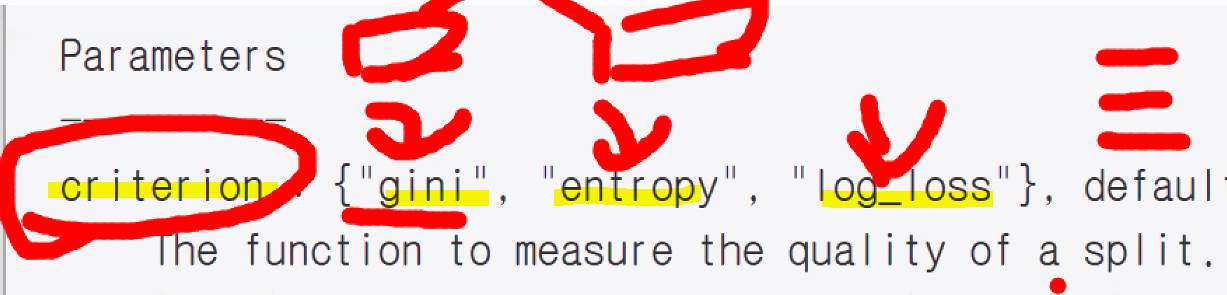
- Í≤∞Í≥ºÎ•º Î≥¥Í≥† ÌåêÎã®ÏùÑ Ìï¥ÏïºÌïúÎã§. ÏûêÏã†ÏùÑ ÎØøÏßÄ ÎßêÍ≤É.

# EDAÎ•º Îçî ÏâΩÍ≤å
- ydata ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÇ¨Ïö©

In [52]:
#1. Îç∞Ïù¥ÌÑ∞Î°úÎî©Î∂ÄÌÑ∞ Îã§Ïãú
data2 = pd.read_csv("./data/salary2.csv")
data2.head(2)

age workclass education  education-num       marital-status  \
0   25   Private      11th              7        Never-married   
1   38   Private   HS-grad              9   Married-civ-spouse   

           occupation relationship    race    sex  capital-gain  capital-loss  \
0   Machine-op-inspct    Own-child   Black   Male             0             0   
1     Farming-fishing      Husband   White   Male             0             0   

   hours-per-week  native-country   class  
0              40   United-States   <=50K  
1              50   United-States   <=50K

ÏÑ§Ïπò
https://github.com/ydataai/ydata-profiling
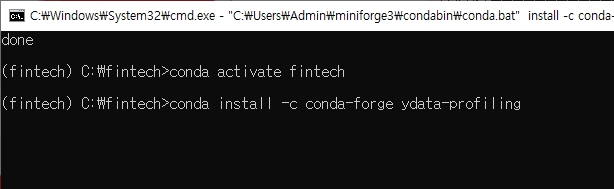

In [14]:
from ydata_profiling import ProfileReport

In [18]:
profile = ProfileReport(data2, title="Profiling Report")

In [19]:
profile.to_file("salary2_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:01<00:00, 13.31it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

ÏôÑÎ£å ÌõÑ 
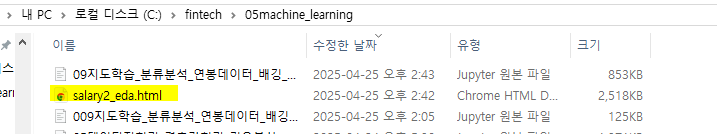
ÏõπÎ∏åÎùºÏö∞Ï†Ä Í∏∞Î∞òÏúºÎ°ú Ï†úÍ≥µÎêòÎäî ÏÑúÎπÑÏä§ÎùºÏÑú <br>Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Î©îÎ™®Î¶¨ ÌÜµÌï¥ Ï≤òÎ¶¨Í∞Ä Ïñ¥Î†§Ïö∏ Ï†ïÎèÑÍ∞Ä ÎêòÎ©¥ Î©àÏ∂∞Î≤ÑÎ¶º.
<br>
- ydataÍ≤∞Í≥ºÎ•º ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [20]:
data2 = data2.dropna() # Í≤∞Ï∏°ÏóÜÏï§ Í±∏Î°ú Ïû¨Ìï†Îãπ
data2

age      workclass      education  education-num       marital-status  \
0       25        Private           11th              7        Never-married   
1       38        Private        HS-grad              9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm             12   Married-civ-spouse   
3       44        Private   Some-college             10   Married-civ-spouse   
5       34        Private           10th              6        Never-married   
...    ...            ...            ...            ...                  ...   
48837   27        Private     Assoc-acdm             12   Married-civ-spouse   
48838   40        Private        HS-grad              9   Married-civ-spouse   
48839   58        Private        HS-grad              9              Widowed   
48840   22        Private        HS-grad              9        Never-married   
48841   52   Self-emp-inc        HS-grad              9   Married-civ-spouse   

               occupation    relationship    race      sex  capital-gain  \
0       Machine-op-inspct       Own-child   Black     Male             0   
1         Farming-fishing         Husband   White     Male             0   
2         Protective-serv         Husband   White     Male             0   
3       Machine-op-inspct         Husband   Black     Male          7688   
5           Other-service   Not-in-family   White     Male             0   
...                   ...             ...     ...      ...           ...   
48837        Tech-support            Wife   White   Female             0   
48838   Machine-op-inspct         Husband   White     Male             0   
48839        Adm-clerical       Unmarried   White   Female             0   
48840        Adm-clerical       Own-child   White     Male             0   
48841     Exec-managerial            Wife   White   Female         15024   

       capital-loss  hours-per-week  native-country   class  
0                 0              40   United-States   <=50K  
1                 0              50   United-States   <=50K  
2                 0              40   United-States    >50K  
3                 0              40   United-States    >50K  
5                 0              30   United-States   <=50K  
...             ...             ...             ...     ...  
48837             0              38   United-States   <=50K  
48838             0              40   United-States    >50K  
48839             0              40   United-States   <=50K  
48840             0              20   United-States   <=50K  
48841             0              40   United-States    >50K  

[45222 rows x 14 columns]

In [22]:
data2[data2.duplicated()]

age workclass      education  education-num       marital-status  \
595     59   Private        HS-grad              9             Divorced   
653     32   Private        HS-grad              9   Married-civ-spouse   
741     40   Private        HS-grad              9   Married-civ-spouse   
864     24   Private      Bachelors             13        Never-married   
1131    44   Private    Prof-school             15   Married-civ-spouse   
...    ...       ...            ...            ...                  ...   
48784   47   Private        HS-grad              9   Married-civ-spouse   
48793   20   Private        HS-grad              9        Never-married   
48808   22   Private   Some-college             10        Never-married   
48838   40   Private        HS-grad              9   Married-civ-spouse   
48840   22   Private        HS-grad              9        Never-married   

               occupation    relationship    race      sex  capital-gain  \
595         Other-service   Not-in-family   White   Female             0   
653                 Sales         Husband   White     Male             0   
741          Craft-repair         Husband   White     Male             0   
864        Prof-specialty   Not-in-family   White     Male             0   
1131       Prof-specialty         Husband   White     Male         99999   
...                   ...             ...     ...      ...           ...   
48784        Craft-repair         Husband   White     Male             0   
48793   Machine-op-inspct       Own-child   White     Male             0   
48808        Adm-clerical       Own-child   White     Male             0   
48838   Machine-op-inspct         Husband   White     Male             0   
48840        Adm-clerical       Own-child   White     Male             0   

       capital-loss  hours-per-week  native-country   class  
595               0              40   United-States   <=50K  
653               0              40   United-States   <=50K  
741               0              40   United-States   <=50K  
864               0              35   United-States   <=50K  
1131              0              60   United-States    >50K  
...             ...             ...             ...     ...  
48784             0              40   United-States   <=50K  
48793             0              40   United-States   <=50K  
48808             0              40   United-States   <=50K  
48838             0              40   United-States    >50K  
48840             0              20   United-States   <=50K  

[5982 rows x 14 columns]

In [24]:
data2= data2.drop_duplicates() # Ï§ëÎ≥µÏ†úÍ±∞ Ïû¨Ìï†Îãπ

In [25]:
# ÎìúÎ°≠Ìï† Ïª¨ÎüºÎ™Ö Ï∞æÍ∏∞
data2.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [27]:
# Ïó∞Í¥ÄÎèÑÍ∞Ä ÎÜíÏùÄ ÎëêÏª¨Îüº ÎìúÎ°≠
data2=data2.drop(["education","relationship"], axis=1) 
data2

age      workclass  education-num       marital-status  \
0       25        Private              7        Never-married   
1       38        Private              9   Married-civ-spouse   
2       28      Local-gov             12   Married-civ-spouse   
3       44        Private             10   Married-civ-spouse   
5       34        Private              6        Never-married   
...    ...            ...            ...                  ...   
48835   53        Private             14   Married-civ-spouse   
48836   22        Private             10        Never-married   
48837   27        Private             12   Married-civ-spouse   
48839   58        Private              9              Widowed   
48841   52   Self-emp-inc              9   Married-civ-spouse   

               occupation    race      sex  capital-gain  capital-loss  \
0       Machine-op-inspct   Black     Male             0             0   
1         Farming-fishing   White     Male             0             0   
2         Protective-serv   White     Male             0             0   
3       Machine-op-inspct   Black     Male          7688             0   
5           Other-service   White     Male             0             0   
...                   ...     ...      ...           ...           ...   
48835     Exec-managerial   White     Male             0             0   
48836     Protective-serv   White     Male             0             0   
48837        Tech-support   White   Female             0             0   
48839        Adm-clerical   White   Female             0             0   
48841     Exec-managerial   White   Female         15024             0   

       hours-per-week  native-country   class  
0                  40   United-States   <=50K  
1                  50   United-States   <=50K  
2                  40   United-States    >50K  
3                  40   United-States    >50K  
5                  30   United-States   <=50K  
...               ...             ...     ...  
48835              40   United-States    >50K  
48836              40   United-States   <=50K  
48837              38   United-States   <=50K  
48839              40   United-States   <=50K  
48841              40   United-States    >50K  

[39240 rows x 12 columns]

In [28]:
data2=data2.reset_index(drop=True)
data2

age      workclass  education-num       marital-status  \
0       25        Private              7        Never-married   
1       38        Private              9   Married-civ-spouse   
2       28      Local-gov             12   Married-civ-spouse   
3       44        Private             10   Married-civ-spouse   
4       34        Private              6        Never-married   
...    ...            ...            ...                  ...   
39235   53        Private             14   Married-civ-spouse   
39236   22        Private             10        Never-married   
39237   27        Private             12   Married-civ-spouse   
39238   58        Private              9              Widowed   
39239   52   Self-emp-inc              9   Married-civ-spouse   

               occupation    race      sex  capital-gain  capital-loss  \
0       Machine-op-inspct   Black     Male             0             0   
1         Farming-fishing   White     Male             0             0   
2         Protective-serv   White     Male             0             0   
3       Machine-op-inspct   Black     Male          7688             0   
4           Other-service   White     Male             0             0   
...                   ...     ...      ...           ...           ...   
39235     Exec-managerial   White     Male             0             0   
39236     Protective-serv   White     Male             0             0   
39237        Tech-support   White   Female             0             0   
39238        Adm-clerical   White   Female             0             0   
39239     Exec-managerial   White   Female         15024             0   

       hours-per-week  native-country   class  
0                  40   United-States   <=50K  
1                  50   United-States   <=50K  
2                  40   United-States    >50K  
3                  40   United-States    >50K  
4                  30   United-States   <=50K  
...               ...             ...     ...  
39235              40   United-States    >50K  
39236              40   United-States   <=50K  
39237              38   United-States   <=50K  
39238              40   United-States   <=50K  
39239              40   United-States    >50K  

[39240 rows x 12 columns]

In [30]:
# ÎçîÎØ∏ Ï∂îÍ∞ÄÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞
X3 = pd.get_dummies(data2, drop_first=True)
y3 = X3['class_ >50K']
X3 = X3.drop("class_ >50K", axis=1)

# 0425:15:20Î∂Ñ Ï†ÑÌõÑ

In [43]:
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.4,stratify=3,random_state=10)

InvalidParameterError: The 'stratify' parameter of train_test_split must be an array-like or None. Got 3 instead.

In [37]:
# Î∞òÎ≥µÎ¨∏ ÌãÄ
dtc3 = DecisionTreeClassifier(random_state=10)
dtc3.fit(X3_train,y3_train)
pred3 = dtc3.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.7947884811416922
              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696



In [38]:
# Îß•Ïä§ÎéÅÏä§ Î∞îÍøÄ Î∞òÎ≥µÎ¨∏
for i in range(1,31):    
    dtc3 = DecisionTreeClassifier(random_state=10)
    dtc3.fit(X3_train,y3_train)
    pred3 = dtc3.predict(X3_test)

# Íµ¨Î∂ÑÏÑ† ÎßåÎì§Ïñ¥ Ï£ºÍ∏∞
    print("="*30,f"max_depth:{i}","="*30)
    
    print(accuracy_score(y3_test,pred3))
    print(classification_report(y3_test,pred3))
    
    
# ÎèåÎ†§Î≥∏ ÌõÑ Ï†ïÌôïÎèÑ(accuracy_score) Îì± ÏµúÏ†ÅÏùò depthÎ•º Í∞ÄÏ†∏Ïò§Í∏∞

============================== max_depth:1 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696

============================== max_depth:2 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696

============================== max_depth:3 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       False

============================== max_depth:21 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696

============================== max_depth:22 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696

============================== max_depth:23 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       Fa

In [ ]:
# ÏµúÏ†ÅÏùò depthÍ∞í Ï£ºÍ∏∞
dtc3 = DecisionTreeClassifier(random_state=10, max_depth=8)
dtc3.fit(X3_train,y3_train)
pred3 = dtc3.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

# Ïù¥Î∂ÄÎ∂Ñ Îã§Ïãú Îì§Ïñ¥Î¥êÏïºÌï®

In [39]:
#Ïñ¥Îñ§ Î™®Îç∏ Ïì∏ÏßÄ ÏµúÏ¢ÖÍ≤∞Ï†ï

print(classification_report(y_test,pred))
# precision(ÏòàÏ∏°)Ïù¥ Ï§ëÏöîÌï†Îïå Ï¢ãÏùÄ Î™®Îç∏
print(classification_report(y3_test,pred3))
# recall(Ïã§Ï†ú)Í∞Ä Ï§ëÏöîÌï†Îïå Ï¢ãÏùÄ Î™®Îç∏


              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696

              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696



Ïù¥ÏÉÅ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î™®Îç∏ÏùÑ ÌïÑÏöîÏóê ÎßûÍ≤å ÎßåÎì§Ïñ¥Î¥§Ïùå
# Î∞∞ÍπÖ
- ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥Ïùò ÏÑ±Îä• Ìñ•ÏÉÅ
- ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥ ÌïòÎÇòÎ°ú ÏòàÏ∏°ÌïòÍ≤å ÎêòÍ≥† Ï°∞Í±¥Ïùò ÏòÅÌñ•Ïù¥ Ïã¨Ìï®
- Bootstrap AggregatingÏùò Ï§ÑÏûÑÎßê
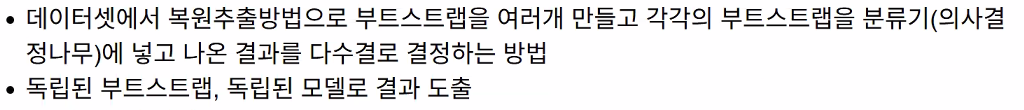
- BootstrapÏùÄ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå<br> ÏõêÎûò Îç∞Ïù¥ÌÑ∞Í∞Ä 8Í∞ú ÏûàÏúºÎ©¥ Î≥µÏõêÏ∂îÏ∂ú ÏßÑÌñâ
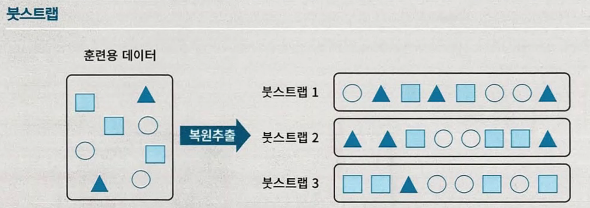

Îã§ÏàòÍ≤∞Î°ú ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Î™®Îç∏Ïù¥ ÏÑ†Ï†ïÎê®
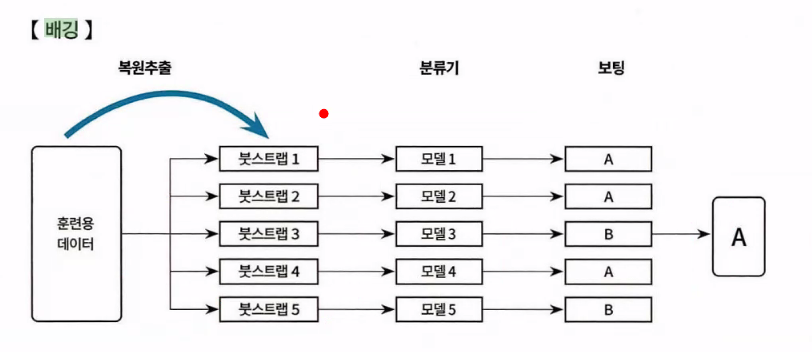

## Î∂ÄÏä§ÌåÖ
- Î∞∞ÍπÖÏ≤òÎüº Ïó¨Îü¨ Î™®ÌòïÏùÑ ÎßåÎì¶ <br> Î∞∞ÍπÖÍ≥º Îã¨Î¶¨ ÎèÖÎ¶ΩÏ†ÅÏù¥ÏßÄ ÏïäÏùå
- Î∂ìÏä§Ìä∏Îû©ÏúºÎ°ú ÎßåÎì† Î™®Îç∏Î°ú Î∂ÑÏÑù ÌõÑ Ïò§ÎãµÎßå Î™®ÏïÑÏÑú <br> Ïû¨ÌïôÏäµ Ïû¨Î∂ÑÎ•ò Ìñ•ÏÉÅÎêú Î™®Îç∏ÏùÑ Îã§Ïãú ÎßåÎìúÎäî..
- max_depthÎäî 1
- Ï†êÏßÑÏ†ÅÏúºÎ°ú ÏÑ±Îä•Ïù¥ Ìñ•ÏÉÅÎêòÎäî ÏïåÍ≥†Î¶¨Ï¶ò
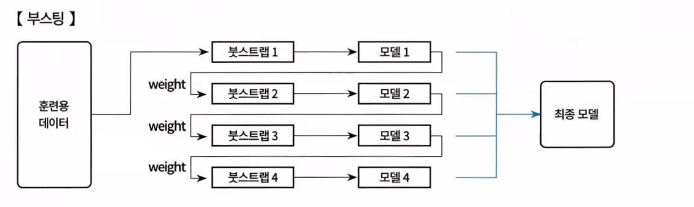
- Ïô∏Î∂ÄÌå®ÌÇ§ÏßÄ<br> Îπ†Î•∏ XGBoost, Light GBM <br> ÎäêÎ¶∞ Gradient AdaBoosting
- AdaBoostClassifier
    - ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îßå Î∞îÍøîÏ£ºÎ©¥ Îã§ÏñëÌïú ÏïôÏÉÅÎ∏î ÏÇ¨Ïö©Í∞ÄÎä• ÏóÑÏ≤≠ Í∏∏Îã§Îäî Ï†ê... https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

## ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ (=ÎûúÎç§Î∞∞ÍπÖ)
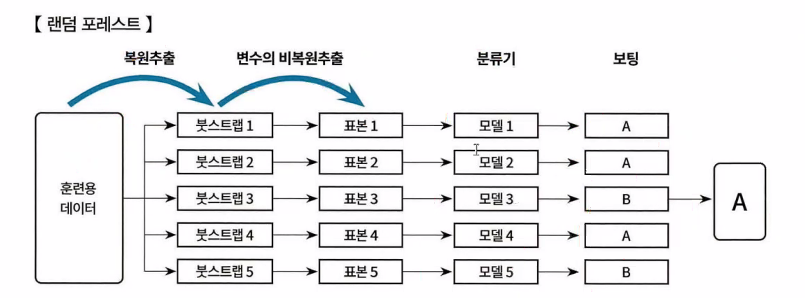
- ÎèÖÎ¶ΩÏ†Å Î∂ìÏä§Ìä∏Îû© ÍπåÏßÄÎäî Î∞∞ÍπÖÍ≥º ÎπÑÏä∑.
- ÎèÖÎ¶ΩÏÑ±Ïù¥ Ìñ•ÏÉÅ : ÎπÑÎ≥µÏõê Ï∂îÏ∂úÏùÑ ÏßÑÌñâÌïúÎã§ÎäîÏ†êÏù¥ Îã§Î¶Ñ. ÎπÑÎ≥µÏõêÏùÄ ÌïúÎ≤àÎΩëÏùÄÍ≤å Î≥µÏõêÎêòÏßÄ ÏïäÏùå 
- ÎÇòÎ®∏ÏßÄÎäî ÎòëÍ∞ôÏùå
- sklearn.ensemble

## ÏÑ∏Í∞ÄÏßÄ Î™®Îç∏ÏùÑ ÎèåÎ†§ÏÑú ÏÇ¨Ïö©.

# Î∞∞ÍπÖ, Î∂ÄÏä§ÌåÖ, ÎûúÎç§Î∞∞ÍπÖ Ïã§Ïäµ

In [40]:
# ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïóê Íµ¨ÌòÑÎêòÏñ¥ÏûàÏùå
from sklearn.ensemble import BaggingClassifier

In [41]:
# Î∞∞ÍπÖ'
bc = BaggingClassifier(n_estimators=10, n_jobs=2, random_state=10)
bc.fit(X3_train, y3_train)
pred3 = bc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8289373088685015
              precision    recall  f1-score   support

       False       0.87      0.91      0.89     11699
        True       0.69      0.59      0.64      3997

    accuracy                           0.83     15696
   macro avg       0.78      0.75      0.76     15696
weighted avg       0.82      0.83      0.82     15696



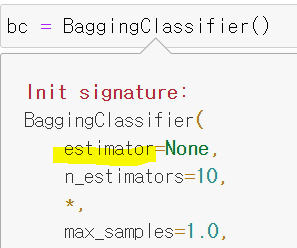 Ïù¥Î†áÍ≤å ÎêòÏñ¥ÏûàÏßÄÎßå ÏùòÏÇ¨Í≤∞Ï†ï ÎÇòÎ¨¥Í∞Ä ÎîîÌè¥Ìä∏ Í∞íÏúºÎ°ú ÎêúÏ†êÏùÑ ÎçîÏïÑÎûòÏóêÏÑú ÌôïÏù∏Ìï†ÏàòÏûàÎã§.
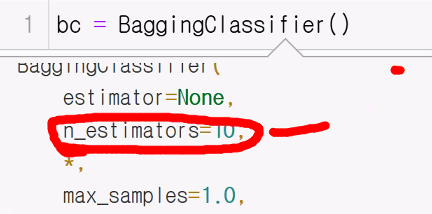
ÏùòÏÇ¨Í≤∞Ï†ï ÎÇòÎ¨¥Î°ú Î∂ÑÎ•òÌï† Îç∞Ïù¥ÌÑ∞ÏÖã Í∞úÏàò = 10Í∞ú
<br> ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥ÎèÑ 10Í∞úÏù∏Ï†ê.

- Ìï≠ÏÉÅ ÏûäÏßÄÎßêÏïÑÏïºÌï† ÎûúÎç§ Ïä§ÌÖåÏù¥Ìä∏
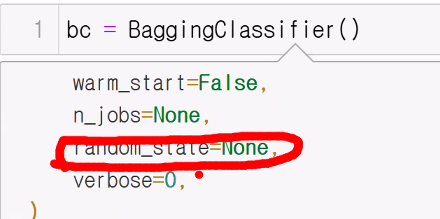

- cpu ÏΩîÏñ¥Î•º ÎèôÏãú ÏÇ¨Ïö©ÎåÄÏàòÎ•º ÏÑ§Ï†ïÌï†ÏàòÏûàÏùå
- njobs=-1 Ïù¥Î©¥ Î™®Îì† ÏΩîÏñ¥ÏÇ¨Ïö©
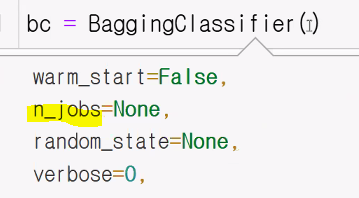

In [42]:
# Î∞∞ÍπÖ'' 
est= DecisionTreeClassifier(max_depth=9, random_state=10)
                            # ÏÑ±Îä•Ï†úÏùº Ï¢ãÏïòÎçò ÌååÎùºÎØ∏ÌÑ∞Î•º ÎÑ£Ïñ¥Ï£ºÍ∏∞
                                    # Ïó¨Í∏∞ÏóêÎèÑ ÎåÄÏûÖ
bc = BaggingClassifier(n_estimators=est, n_jobs=2, random_state=10)
bc.fit(X3_train, y3_train)
pred3 = bc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

InvalidParameterError: The 'n_estimators' parameter of BaggingClassifier must be an int in the range [1, inf). Got DecisionTreeClassifier(max_depth=9, random_state=10) instead.

# Î∂ÄÏä§ÌåÖ Ïã§Ïäµ
ÏóêÏù¥Îã§ ÏÇ¨Ïö©

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
# Î∂ÄÏä§ÌåÖ
                                          # ÌïôÏäµÏóê Ï¥òÏ¥òÌïú Ï†ïÎèÑ (Îü¨ÎãùÎ†àÏù¥Ìä∏Í∞Ä ÏûëÏùÑÏàòÎ°ù ÍººÍºº)
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=10)
abc.fit(X3_train, y3_train)
pred3 = abc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8453746177370031
              precision    recall  f1-score   support

       False       0.86      0.95      0.90     11699
        True       0.79      0.53      0.64      3997

    accuracy                           0.85     15696
   macro avg       0.82      0.74      0.77     15696
weighted avg       0.84      0.85      0.83     15696



**Îã§Î•∏ Ïñ¥ÏÖàÎ∏î(Í∑∏ÎùºÎîîÏñ∏Ìä∏Î∂ÄÏä§Ìä∏) Ìï¥Î≥¥Í∏∞**

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
# Í∑∏ÎùºÎîîÏñ∏Ìä∏ Î∂ÄÏä§Ìä∏
                                          # ÌïôÏäµÏóê Ï¥òÏ¥òÌïú Ï†ïÎèÑ (Îü¨ÎãùÎ†àÏù¥Ìä∏Í∞Ä ÏûëÏùÑÏàòÎ°ù ÍººÍºº)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=10)
gbc.fit(X3_train, y3_train)
pred3 = gbc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8591997961264016
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11699
        True       0.78      0.62      0.69      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.78      0.80     15696
weighted avg       0.85      0.86      0.85     15696



# XGBOOST
- Îî∞Î°ú ÏÑ§ÏπòÌï¥ÏïºÌï® (ÌÑ∞ÎØ∏ÎÑê)
- Î∂ÄÏä§ÌåÖÏóêÏÑú Î≥ëÎ†¨Ïãù Ï≤òÎ¶¨Í∞Ä ÏïàÎêòÎçò Î¨∏Ï†úÎ•º Ìï¥Í≤∞
    - cpu -> gpu 
- Îß§Ïö∞ Îπ†Î•∏ Ï≤òÎ¶¨ÏÜçÎèÑ
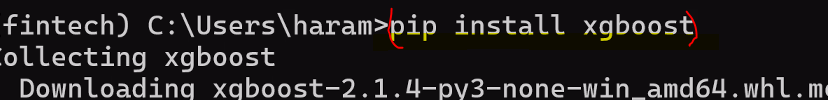
- ÏÑ§Ïπò https://xgboost.readthedocs.io/en/release_3.0.0/get_started.html
![image-2.png](attachment:image-2.png)

In [49]:
from xgboost import XGBRFClassifier

In [51]:
# xgb 
xgb = GradientBoostingClassifier(n_estimators=100, random_state=10)
xgb.fit(X3_train, y3_train)
pred3 = xgb.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8591997961264016
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11699
        True       0.78      0.62      0.69      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.78      0.80     15696
weighted avg       0.85      0.86      0.85     15696



In [53]:
# Î∞òÎ≥µÎ¨∏ ÎèåÎ†§Î≥¥Í∏∞
for i in range(1,20):
    xgb = GradientBoostingClassifier(n_estimators=100, random_state=10)
    xgb.fit(X3_train, y3_train)
    pred3 = xgb.predict(X3_test)
    print(accuracy_score(y3_test,pred3))
    print(classification_report(y3_test,pred3))

0.8591997961264016
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11699
        True       0.78      0.62      0.69      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.78      0.80     15696
weighted avg       0.85      0.86      0.85     15696

0.8591997961264016
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11699
        True       0.78      0.62      0.69      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.78      0.80     15696
weighted avg       0.85      0.86      0.85     15696

0.8591997961264016
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11699
        True       0.78      0.62      0.69      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.78      0.80     15696
weighted avg     

In [59]:
%%time
xgb = GradientBoostingClassifier(n_estimators=1000, random_state=10)
xgb.fit(X3_train, y3_train)
pred3 = xgb.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8623216106014271
              precision    recall  f1-score   support

       False       0.89      0.93      0.91     11699
        True       0.76      0.67      0.71      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.80      0.81     15696
weighted avg       0.86      0.86      0.86     15696

CPU times: total: 34.4 s
Wall time: 35.3 s


# LightGBM
- XGboost Î≥¥Îã§ Îçî Îπ†Î¶Ñ
- ÎπÑÎåÄÏπ≠ Ìä∏Î¶¨Î°ú Î∂ÑÎ•òÌï® ) max_depthÍ∞Ä -1 ) ÏµúÎåÄÎùºÎäîÎúª.
    - depthÏ†úÌïú ÏóÜÏù¥ Î∂ÑÏÑùÏûòÎêòÎäî Î∞©Ìñ•ÏúºÎ°ú ÎªóÏπ®
    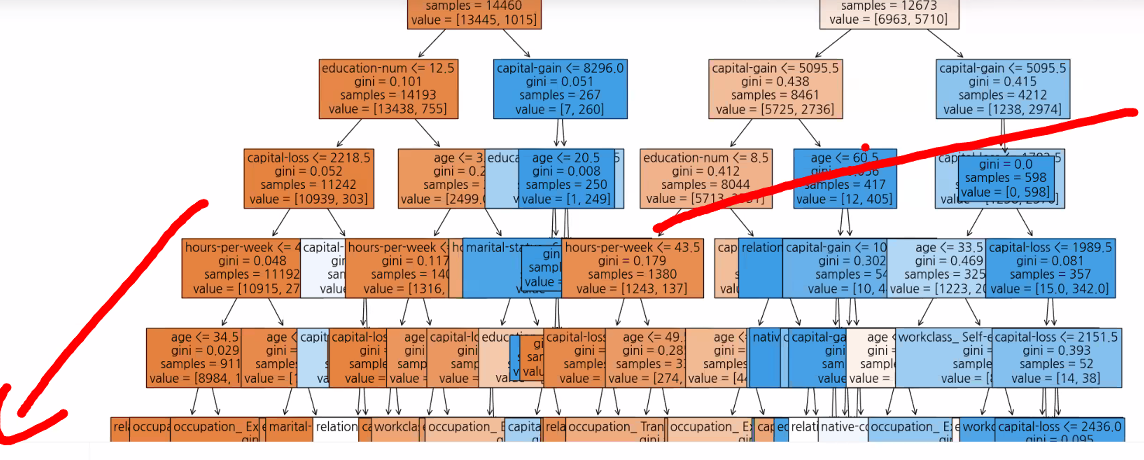
- ÏÑ§Ïπò
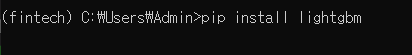

In [55]:
from lightgbm import LGBMClassifier

In [57]:
%%time
lgbm = LGBMClassifier(n_estimators=1000, n_jobs=10, random_state=10)
lgbm.fit(X3_train, y3_train)
pred3 = lgbm.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5978, number of negative: 17566
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 446
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.253908 -> initscore=-1.077879
[LightGBM] [Info] Start training from score -1.077879
0.8519367991845056
              precision    recall  f1-score   support

       False       0.89      0.91      0.90     11699
        True       0.73      0.67      0.70      3997

    accuracy                           0.85     15696
   macro avg       0.81      0.79      0.80     15696
weighted avg       0.85      0.85      0.85     15696

CPU times: total: 

# CatBoost
- ÌäúÌÜ†Î¶¨Ïñº Ï†úÍ≥µ: https://catboost.ai/docs/en/concepts/tutorials
- 

In [60]:
from catboost import CatBoostClassifier

In [62]:
%%time
cbc = CatBoostClassifier(n_estimators=1000 ,random_state=10)
cbc.fit(X3_train, y3_train)
pred3 = cbc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

Learning rate set to 0.039694
0:	learn: 0.6543189	total: 141ms	remaining: 2m 20s
1:	learn: 0.6230632	total: 150ms	remaining: 1m 14s
2:	learn: 0.5932435	total: 160ms	remaining: 53.2s
3:	learn: 0.5650058	total: 171ms	remaining: 42.6s
4:	learn: 0.5420107	total: 180ms	remaining: 35.9s
5:	learn: 0.5198550	total: 191ms	remaining: 31.6s
6:	learn: 0.4990511	total: 202ms	remaining: 28.6s
7:	learn: 0.4814588	total: 211ms	remaining: 26.2s
8:	learn: 0.4660605	total: 222ms	remaining: 24.4s
9:	learn: 0.4538850	total: 234ms	remaining: 23.2s
10:	learn: 0.4416266	total: 245ms	remaining: 22s
11:	learn: 0.4310563	total: 255ms	remaining: 21s
12:	learn: 0.4206623	total: 266ms	remaining: 20.2s
13:	learn: 0.4119377	total: 275ms	remaining: 19.4s
14:	learn: 0.4039812	total: 284ms	remaining: 18.7s
15:	learn: 0.3977329	total: 294ms	remaining: 18.1s
16:	learn: 0.3921903	total: 305ms	remaining: 17.7s
17:	learn: 0.3863481	total: 316ms	remaining: 17.3s
18:	learn: 0.3820768	total: 326ms	remaining: 16.8s
19:	learn: 0.

173:	learn: 0.2914614	total: 1.88s	remaining: 8.93s
174:	learn: 0.2913833	total: 1.89s	remaining: 8.91s
175:	learn: 0.2912140	total: 1.9s	remaining: 8.89s
176:	learn: 0.2911091	total: 1.91s	remaining: 8.88s
177:	learn: 0.2910478	total: 1.92s	remaining: 8.86s
178:	learn: 0.2909801	total: 1.93s	remaining: 8.83s
179:	learn: 0.2908525	total: 1.93s	remaining: 8.81s
180:	learn: 0.2907298	total: 1.94s	remaining: 8.79s
181:	learn: 0.2906823	total: 1.95s	remaining: 8.77s
182:	learn: 0.2906363	total: 1.96s	remaining: 8.75s
183:	learn: 0.2904738	total: 1.97s	remaining: 8.73s
184:	learn: 0.2904027	total: 1.98s	remaining: 8.71s
185:	learn: 0.2903552	total: 1.99s	remaining: 8.7s
186:	learn: 0.2903116	total: 1.99s	remaining: 8.67s
187:	learn: 0.2901561	total: 2s	remaining: 8.65s
188:	learn: 0.2901252	total: 2.01s	remaining: 8.63s
189:	learn: 0.2900541	total: 2.02s	remaining: 8.61s
190:	learn: 0.2899829	total: 2.03s	remaining: 8.58s
191:	learn: 0.2899086	total: 2.03s	remaining: 8.56s
192:	learn: 0.289

350:	learn: 0.2751527	total: 3.53s	remaining: 6.52s
351:	learn: 0.2751225	total: 3.54s	remaining: 6.51s
352:	learn: 0.2750507	total: 3.55s	remaining: 6.5s
353:	learn: 0.2749796	total: 3.56s	remaining: 6.49s
354:	learn: 0.2749265	total: 3.56s	remaining: 6.48s
355:	learn: 0.2748873	total: 3.58s	remaining: 6.47s
356:	learn: 0.2748326	total: 3.58s	remaining: 6.46s
357:	learn: 0.2747413	total: 3.6s	remaining: 6.45s
358:	learn: 0.2746901	total: 3.6s	remaining: 6.43s
359:	learn: 0.2746455	total: 3.61s	remaining: 6.42s
360:	learn: 0.2745844	total: 3.62s	remaining: 6.42s
361:	learn: 0.2743919	total: 3.63s	remaining: 6.4s
362:	learn: 0.2742227	total: 3.64s	remaining: 6.39s
363:	learn: 0.2741875	total: 3.65s	remaining: 6.38s
364:	learn: 0.2739746	total: 3.66s	remaining: 6.37s
365:	learn: 0.2737143	total: 3.67s	remaining: 6.36s
366:	learn: 0.2736627	total: 3.68s	remaining: 6.34s
367:	learn: 0.2736069	total: 3.69s	remaining: 6.34s
368:	learn: 0.2735642	total: 3.7s	remaining: 6.32s
369:	learn: 0.273

512:	learn: 0.2656736	total: 5.19s	remaining: 4.92s
513:	learn: 0.2656247	total: 5.2s	remaining: 4.92s
514:	learn: 0.2655401	total: 5.21s	remaining: 4.91s
515:	learn: 0.2655085	total: 5.22s	remaining: 4.89s
516:	learn: 0.2654272	total: 5.22s	remaining: 4.88s
517:	learn: 0.2654045	total: 5.23s	remaining: 4.87s
518:	learn: 0.2653335	total: 5.24s	remaining: 4.86s
519:	learn: 0.2652239	total: 5.25s	remaining: 4.84s
520:	learn: 0.2651829	total: 5.26s	remaining: 4.83s
521:	learn: 0.2650811	total: 5.26s	remaining: 4.82s
522:	learn: 0.2650478	total: 5.27s	remaining: 4.81s
523:	learn: 0.2650134	total: 5.28s	remaining: 4.8s
524:	learn: 0.2649998	total: 5.29s	remaining: 4.78s
525:	learn: 0.2649640	total: 5.3s	remaining: 4.77s
526:	learn: 0.2649316	total: 5.3s	remaining: 4.76s
527:	learn: 0.2648719	total: 5.31s	remaining: 4.75s
528:	learn: 0.2648315	total: 5.32s	remaining: 4.74s
529:	learn: 0.2647544	total: 5.33s	remaining: 4.73s
530:	learn: 0.2647258	total: 5.34s	remaining: 4.72s
531:	learn: 0.26

691:	learn: 0.2588679	total: 6.84s	remaining: 3.04s
692:	learn: 0.2588370	total: 6.85s	remaining: 3.04s
693:	learn: 0.2588024	total: 6.86s	remaining: 3.02s
694:	learn: 0.2587695	total: 6.87s	remaining: 3.02s
695:	learn: 0.2587386	total: 6.88s	remaining: 3.01s
696:	learn: 0.2587084	total: 6.89s	remaining: 2.99s
697:	learn: 0.2586602	total: 6.9s	remaining: 2.98s
698:	learn: 0.2586349	total: 6.91s	remaining: 2.97s
699:	learn: 0.2586115	total: 6.92s	remaining: 2.96s
700:	learn: 0.2585840	total: 6.92s	remaining: 2.95s
701:	learn: 0.2585447	total: 6.93s	remaining: 2.94s
702:	learn: 0.2585339	total: 6.94s	remaining: 2.93s
703:	learn: 0.2584970	total: 6.95s	remaining: 2.92s
704:	learn: 0.2584204	total: 6.96s	remaining: 2.91s
705:	learn: 0.2584094	total: 6.97s	remaining: 2.9s
706:	learn: 0.2583991	total: 6.98s	remaining: 2.89s
707:	learn: 0.2583701	total: 6.99s	remaining: 2.88s
708:	learn: 0.2583182	total: 7s	remaining: 2.87s
709:	learn: 0.2582676	total: 7.01s	remaining: 2.86s
710:	learn: 0.258

858:	learn: 0.2530567	total: 8.29s	remaining: 1.36s
859:	learn: 0.2530057	total: 8.31s	remaining: 1.35s
860:	learn: 0.2529788	total: 8.34s	remaining: 1.35s
861:	learn: 0.2529476	total: 8.35s	remaining: 1.34s
862:	learn: 0.2528903	total: 8.36s	remaining: 1.33s
863:	learn: 0.2528544	total: 8.37s	remaining: 1.32s
864:	learn: 0.2528383	total: 8.38s	remaining: 1.31s
865:	learn: 0.2527854	total: 8.39s	remaining: 1.3s
866:	learn: 0.2527357	total: 8.4s	remaining: 1.29s
867:	learn: 0.2527101	total: 8.41s	remaining: 1.28s
868:	learn: 0.2526916	total: 8.42s	remaining: 1.27s
869:	learn: 0.2526602	total: 8.43s	remaining: 1.26s
870:	learn: 0.2526336	total: 8.44s	remaining: 1.25s
871:	learn: 0.2525650	total: 8.45s	remaining: 1.24s
872:	learn: 0.2525285	total: 8.46s	remaining: 1.23s
873:	learn: 0.2525034	total: 8.47s	remaining: 1.22s
874:	learn: 0.2524719	total: 8.48s	remaining: 1.21s
875:	learn: 0.2524493	total: 8.49s	remaining: 1.2s
876:	learn: 0.2524063	total: 8.5s	remaining: 1.19s
877:	learn: 0.25

# ÎûúÎç§ Î∞∞ÍπÖ (RandomForest)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
%%time
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=10 ,random_state=10)
rfc.fit(X3_train, y3_train)
pred3 = rfc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8298292558613659
              precision    recall  f1-score   support

       False       0.87      0.90      0.89     11699
        True       0.69      0.61      0.65      3997

    accuracy                           0.83     15696
   macro avg       0.78      0.76      0.77     15696
weighted avg       0.82      0.83      0.83     15696

CPU times: total: 37.5 s
Wall time: 6.06 s


In [65]:
# Î∞òÎ≥µÎ¨∏ÏúºÎ°ú max_depth
for i in range(1,21):
    rfc = RandomForestClassifier(max_depth=i,n_estimators=100, n_jobs=10 ,random_state=10)
    rfc.fit(X3_train, y3_train)
    pred3 = rfc.predict(X3_test)
    
    print(i)
    print(accuracy_score(y3_test,pred3))
    print(classification_report(y3_test,pred3))

1
0.7453491335372069
              precision    recall  f1-score   support

       False       0.75      1.00      0.85     11699
        True       0.00      0.00      0.00      3997

    accuracy                           0.75     15696
   macro avg       0.37      0.50      0.43     15696
weighted avg       0.56      0.75      0.64     15696



C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

2
0.7503185524974516
              precision    recall  f1-score   support

       False       0.75      1.00      0.86     11699
        True       1.00      0.02      0.04      3997

    accuracy                           0.75     15696
   macro avg       0.87      0.51      0.45     15696
weighted avg       0.81      0.75      0.65     15696

3
0.7762487257900101
              precision    recall  f1-score   support

       False       0.77      1.00      0.87     11699
        True       0.99      0.12      0.22      3997

    accuracy                           0.78     15696
   macro avg       0.88      0.56      0.54     15696
weighted avg       0.83      0.78      0.70     15696

4
0.7947884811416922
              precision    recall  f1-score   support

       False       0.78      1.00      0.88     11699
        True       0.98      0.20      0.33      3997

    accuracy                           0.79     15696
   macro avg       0.88      0.60      0.60     15696
weighted av

**precisionÎßå Ï§ëÏöîÌïú Í≤ΩÏö∞ÎùºÎ©¥ ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏Í∞Ä Ïì∞Í∏∞Ï¢ãÏùÄ Î™®Îç∏Ïù¥ ÎêòÎäîÍ≤É.**
<br>
Ïó¨Îü¨Í∞úÏùò Î™®Îç∏ÏùÑ ÎèåÎ†§Î¥êÏïºÌïòÎäî Ïù¥Ïú†
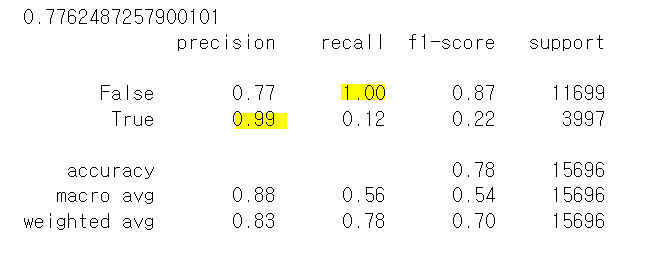
ÏûòÎßûÏ∂îÎäî Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Îã§Î¶Ñ

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc= RandomForestClassifier(random_strate=10)
rfc.fit(X_train,y_train)
pred=ftc.predict(X_test)
print(classification_report(y_test,))